# Ejercicio 3

In [40]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
import warnings
from sklearn.model_selection import GridSearchCV
import pandas as pd
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import explained_variance_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

### Dato Importante
Es importante apreciar como los datos rsultantes del proceso realizado en el punto 2 del parcial son los que se usaran aca. Datos que atravesaron procesos como el Encode, ajuste de dimensionalidad y prueba chi2.

Clase Data para manejo como de la informacion

In [41]:
class Data():
  def __init__(self, df):
    self.X_train, self.X_test, self.y_train, self.y_test = self._split_data(df)
  def _split_data(self, df):
    return train_test_split(df.drop('binds',axis='columns'), df['binds'], stratify = df['binds'], random_state = 11)

## Modelos para proteina 'BDR4'

In [42]:
'''bd4_train = pd.read_parquet('documentos_ejercicio3\\bd4_train.parquet')'''

"bd4_train = pd.read_parquet('documentos_ejercicio3\\bd4_train.parquet')"

In [43]:
'''bdr4 = Data(bd4_train)'''

'bdr4 = Data(bd4_train)'

### KNN - 'sEH'

In [44]:
'''pipeline_knn_bd4 = Pipeline([('scaler', StandardScaler()), ('clasificador', KNeighborsClassifier())])
param_grid_knn_bd4 = [{ 'clasificador__n_neighbors': range(2 , 100),
                     'clasificador__weights': ['distance']}]
kf1 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)
grid_knn_bd4 = GridSearchCV(pipeline_knn_bd4, param_grid_knn_bd4, cv = kf1, scoring = 'roc_auc')
grid_knn_bd4.fit(bdr4.X_train, bdr4.y_train)
print("Mejor parámetro:", grid_knn_bd4.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ",grid_knn_bd4.best_score_)'''

'pipeline_knn_bd4 = Pipeline([(\'scaler\', StandardScaler()), (\'clasificador\', KNeighborsClassifier())])\nparam_grid_knn_bd4 = [{ \'clasificador__n_neighbors\': range(2 , 100),\n                     \'clasificador__weights\': [\'distance\']}]\nkf1 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)\ngrid_knn_bd4 = GridSearchCV(pipeline_knn_bd4, param_grid_knn_bd4, cv = kf1, scoring = \'roc_auc\')\ngrid_knn_bd4.fit(bdr4.X_train, bdr4.y_train)\nprint("Mejor parámetro:", grid_knn_bd4.best_params_)\nprint("Mejor AUC en conjunto de entrenamiento: ",grid_knn_bd4.best_score_)'

Mejor parámetro: {'clasificador__n_neighbors': 99, 'clasificador__weights': 'distance'} \
Mejor AUC en conjunto de entrenamiento:  0.857

In [45]:
'''y_pred = grid_knn_bd4.predict(bdr4.X_test)
predict_knn1 = grid_knn_bd4.predict_proba(bdr4.X_test)[:, 1]
auc_bdr4 = roc_auc_score(bdr4.y_test, predict_knn1)
print("BEST AUC", auc_bdr4)'''

'y_pred = grid_knn_bd4.predict(bdr4.X_test)\npredict_knn1 = grid_knn_bd4.predict_proba(bdr4.X_test)[:, 1]\nauc_bdr4 = roc_auc_score(bdr4.y_test, predict_knn1)\nprint("BEST AUC", auc_bdr4)'

Mejor AUC en conjunto de prueba:  0.846

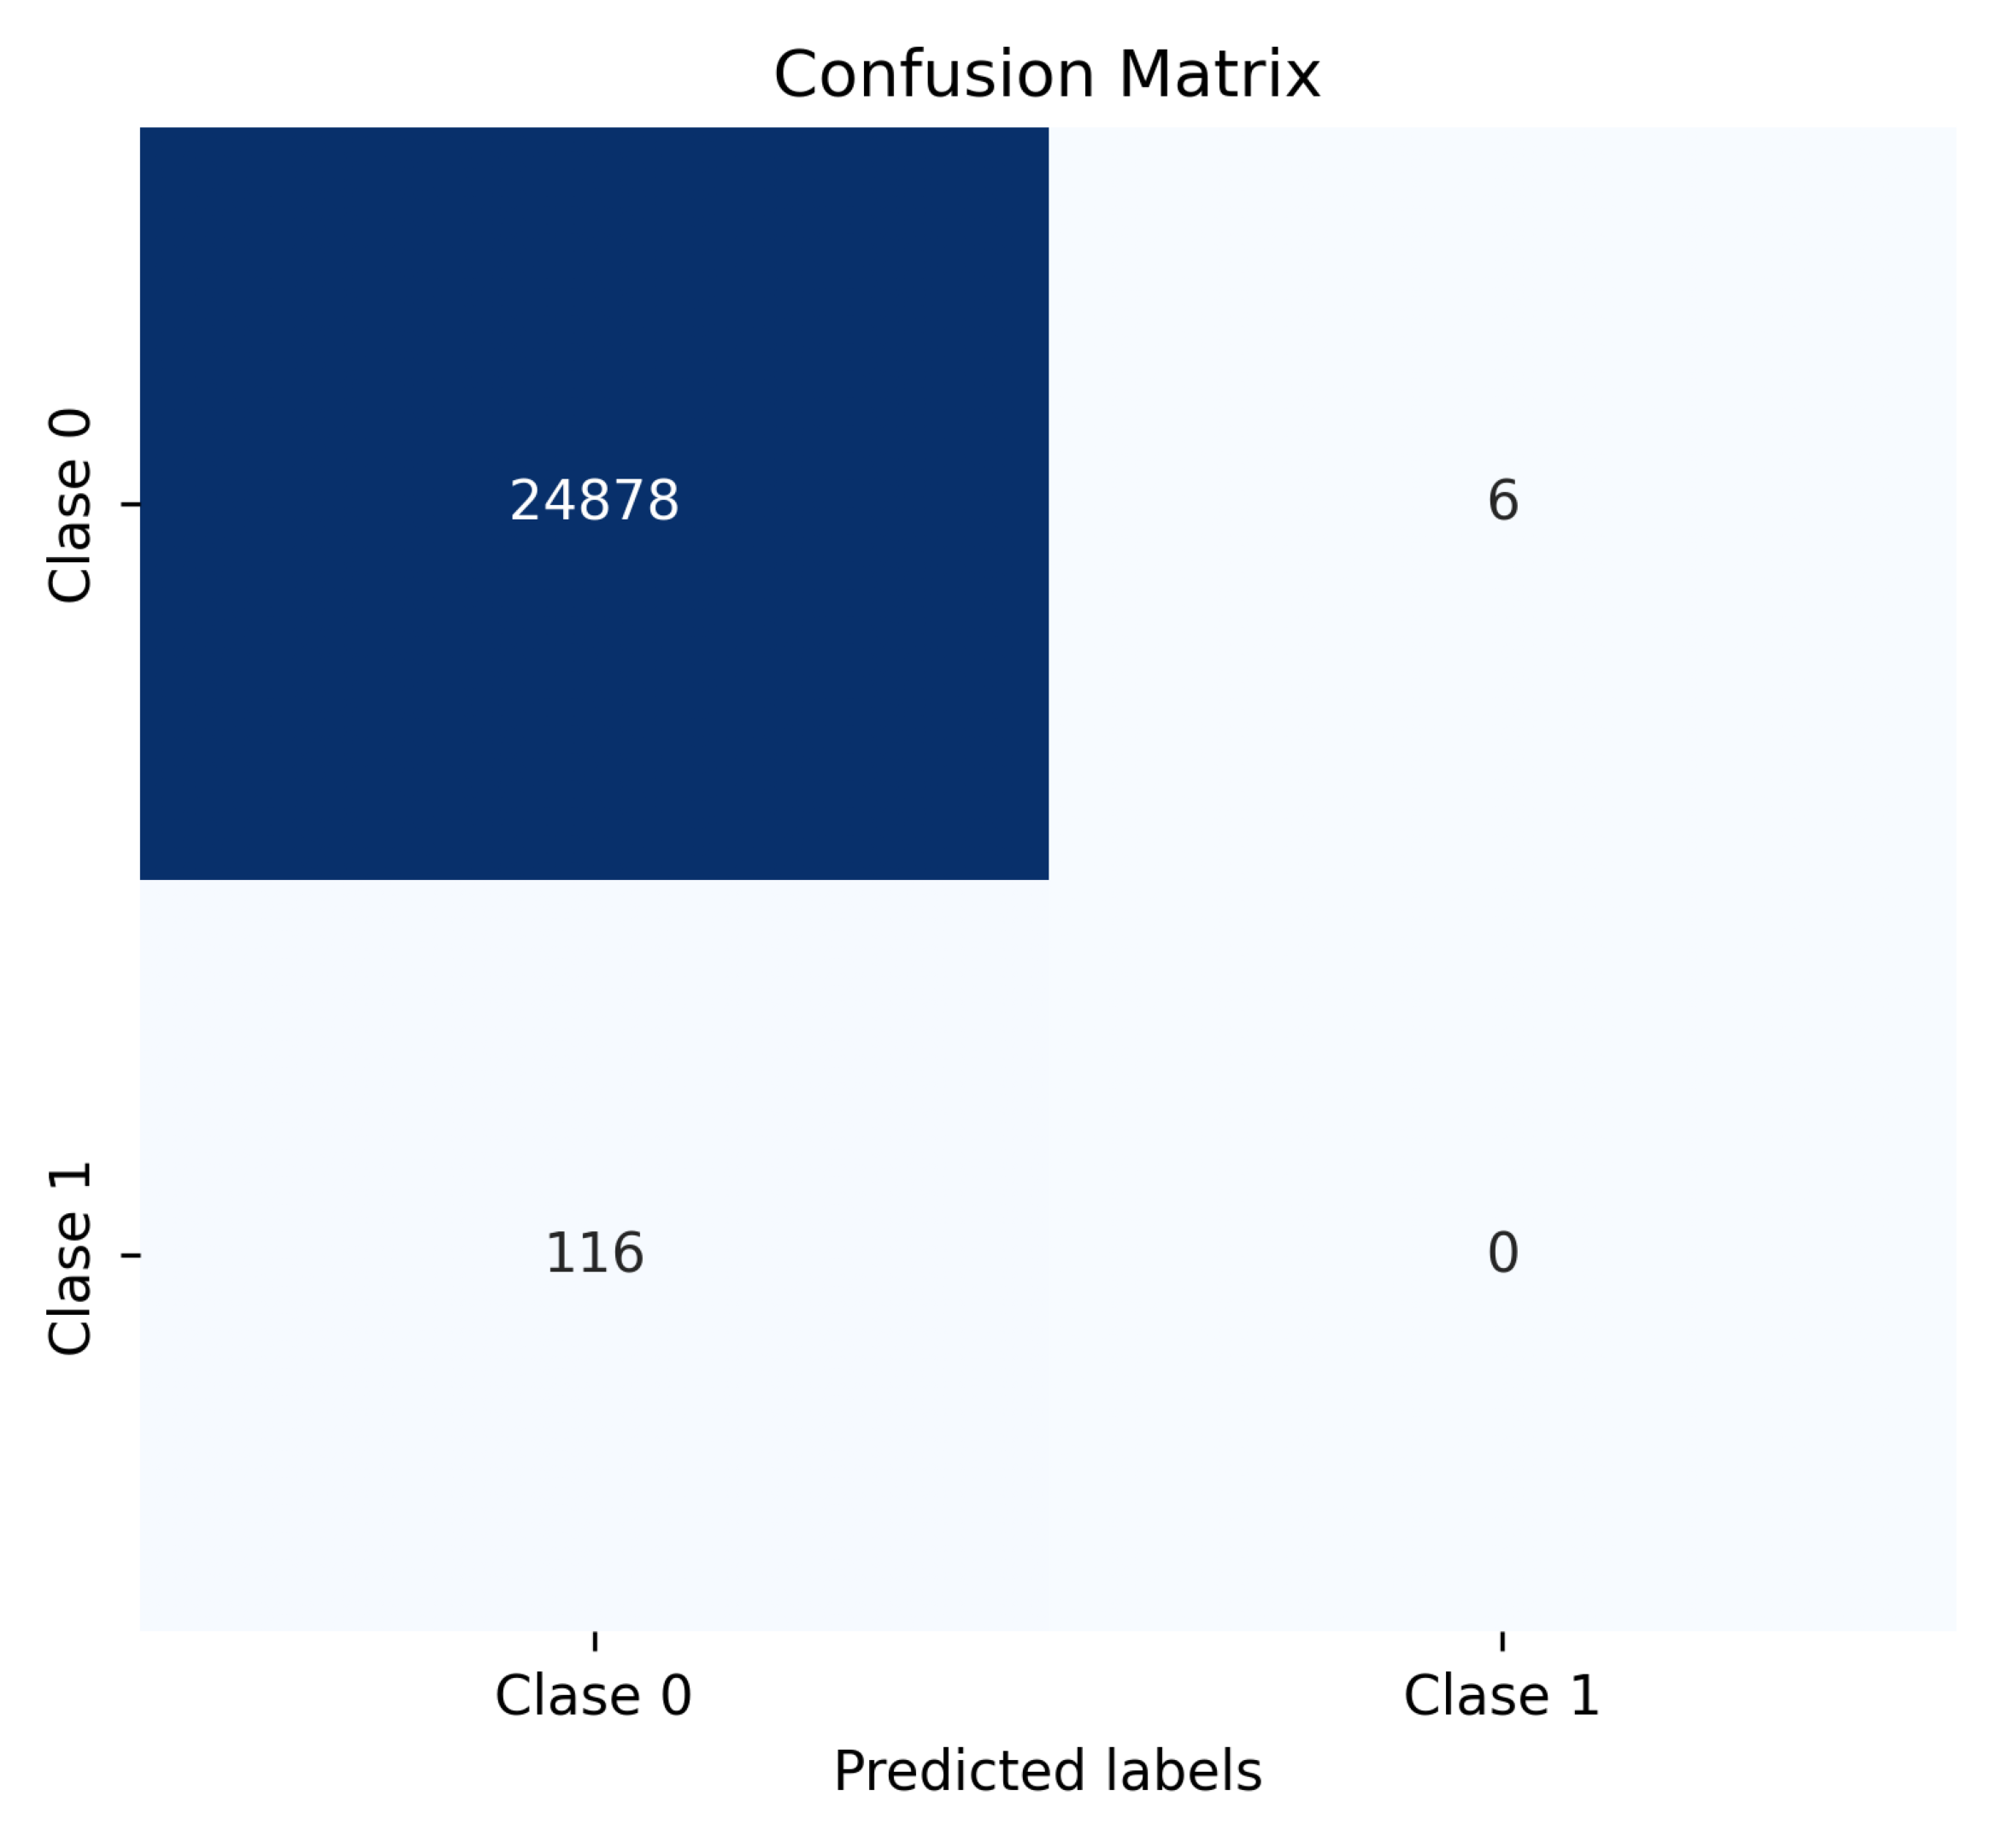

In [46]:
'''y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(bdr4.y_test, y_pred)
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.savefig('conf1_1.png', dpi=300, bbox_inches='tight')

    plt.ylabel('True labels')
    plt.show()
cm = np.array(cm)
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)'''

plt.figure(figsize=(30, 80))  
img = mpimg.imread('documentos_ejercicio3\\conf1_1.png')
plt.imshow(img)
plt.axis('off')  
plt.show()


In [47]:
'''data = {
    'Modelo': ['Knn'],
    'Precision': [
        precision_score(bdr4.y_test, y_pred)
    ],
    'Recall': [
        recall_score(bdr4.y_test, y_pred)
    ],
    'F1 Score': [

        f1_score(bdr4.y_test, y_pred)
    ],
    'ROC AUC': [
        roc_auc_score(bdr4.y_test, predict_knn1)  # También aquí
    ]
}'''
data = {'Modelo': ['Knn'],'Precision': [1],'Recall': [0.043103],'F1 Score': [0.082645],'ROC AUC': [0.846602]}
data_knn = pd.DataFrame(data)
data_knn

Modelo  Precision    Recall  F1 Score   ROC AUC
0    Knn          1  0.043103  0.082645  0.846602

### Logistic - 'BDR4'

In [48]:
'''pipeline_log_bd4 = Pipeline([('scaler', StandardScaler()), ('clasificador', LogisticRegression())])
param_grid_log_bd4 = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)
grid_log_bd4 = GridSearchCV(pipeline_log_bd4, param_grid_log_bd4, cv = kf, scoring = 'roc_auc')
grid_log_bd4.fit(bdr4.X_train, bdr4.y_train)
print("Mejor parámetro:", grid_log_bd4.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ", grid_log_bd4.best_score_)'''

'pipeline_log_bd4 = Pipeline([(\'scaler\', StandardScaler()), (\'clasificador\', LogisticRegression())])\nparam_grid_log_bd4 = {\'clasificador__C\': [0.01, 0.1, 1, 10, 100, 1000]}\nkf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)\ngrid_log_bd4 = GridSearchCV(pipeline_log_bd4, param_grid_log_bd4, cv = kf, scoring = \'roc_auc\')\ngrid_log_bd4.fit(bdr4.X_train, bdr4.y_train)\nprint("Mejor parámetro:", grid_log_bd4.best_params_)\nprint("Mejor AUC en conjunto de entrenamiento: ", grid_log_bd4.best_score_)'

Mejor parámetro: {'clasificador__C': 0.01} \
Mejor AUC en conjunto de entrenamiento:  0.9030094685544606

In [49]:
'''y_pred = grid_log_bd4.predict(bdr4.X_test)
predict_log1 = grid_log_bd4.predict_proba(bdr4.X_test)[:, 1]
auc_bdr4 = roc_auc_score(bdr4.y_test, predict_log1)
print("BEST AUC", auc_bdr4)'''

'y_pred = grid_log_bd4.predict(bdr4.X_test)\npredict_log1 = grid_log_bd4.predict_proba(bdr4.X_test)[:, 1]\nauc_bdr4 = roc_auc_score(bdr4.y_test, predict_log1)\nprint("BEST AUC", auc_bdr4)'

BEST AUC 0.8927653623156272

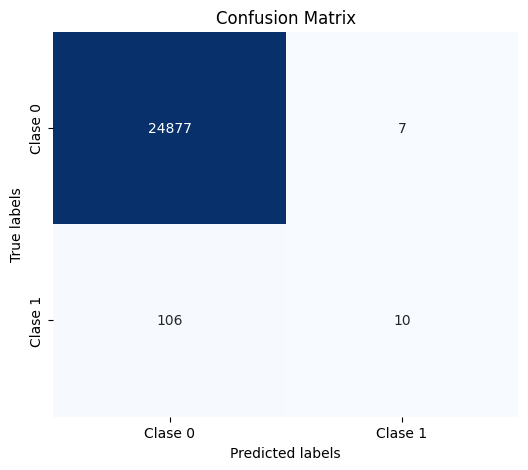

In [50]:
'''predict_log2 = (y_pred > 0.5).astype(int)
cm = confusion_matrix(bdr4.y_test, predict_log2)
'''
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.savefig('conf1_2.png', dpi=300, bbox_inches='tight')
    plt.show()
cm = np.array([[24877,     7],
       [  106,    10]])
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm, class_names)


In [51]:
'''data = {
    'Modelo': ['Logsitc'],
    'Precision': [
        precision_score(bdr4.y_test, y_pred)
    ],
    'Recall': [
        recall_score(bdr4.y_test, y_pred)
    ],
    'F1 Score': [

        f1_score(bdr4.y_test, y_pred)
    ],
    'ROC AUC': [
        roc_auc_score(bdr4.y_test, predict_log1)
    ]
}'''
data = {'Modelo': ['Logsitc'],'Precision': [0.588235],'Recall': [0.086207],'F1 Score': [ 0.150376],'ROC AUC': [0.8927]}
data_log = pd.DataFrame(data)
data_log

Modelo  Precision    Recall  F1 Score  ROC AUC
0  Logsitc   0.588235  0.086207  0.150376   0.8927

### Curva ROC - 'BDR4'

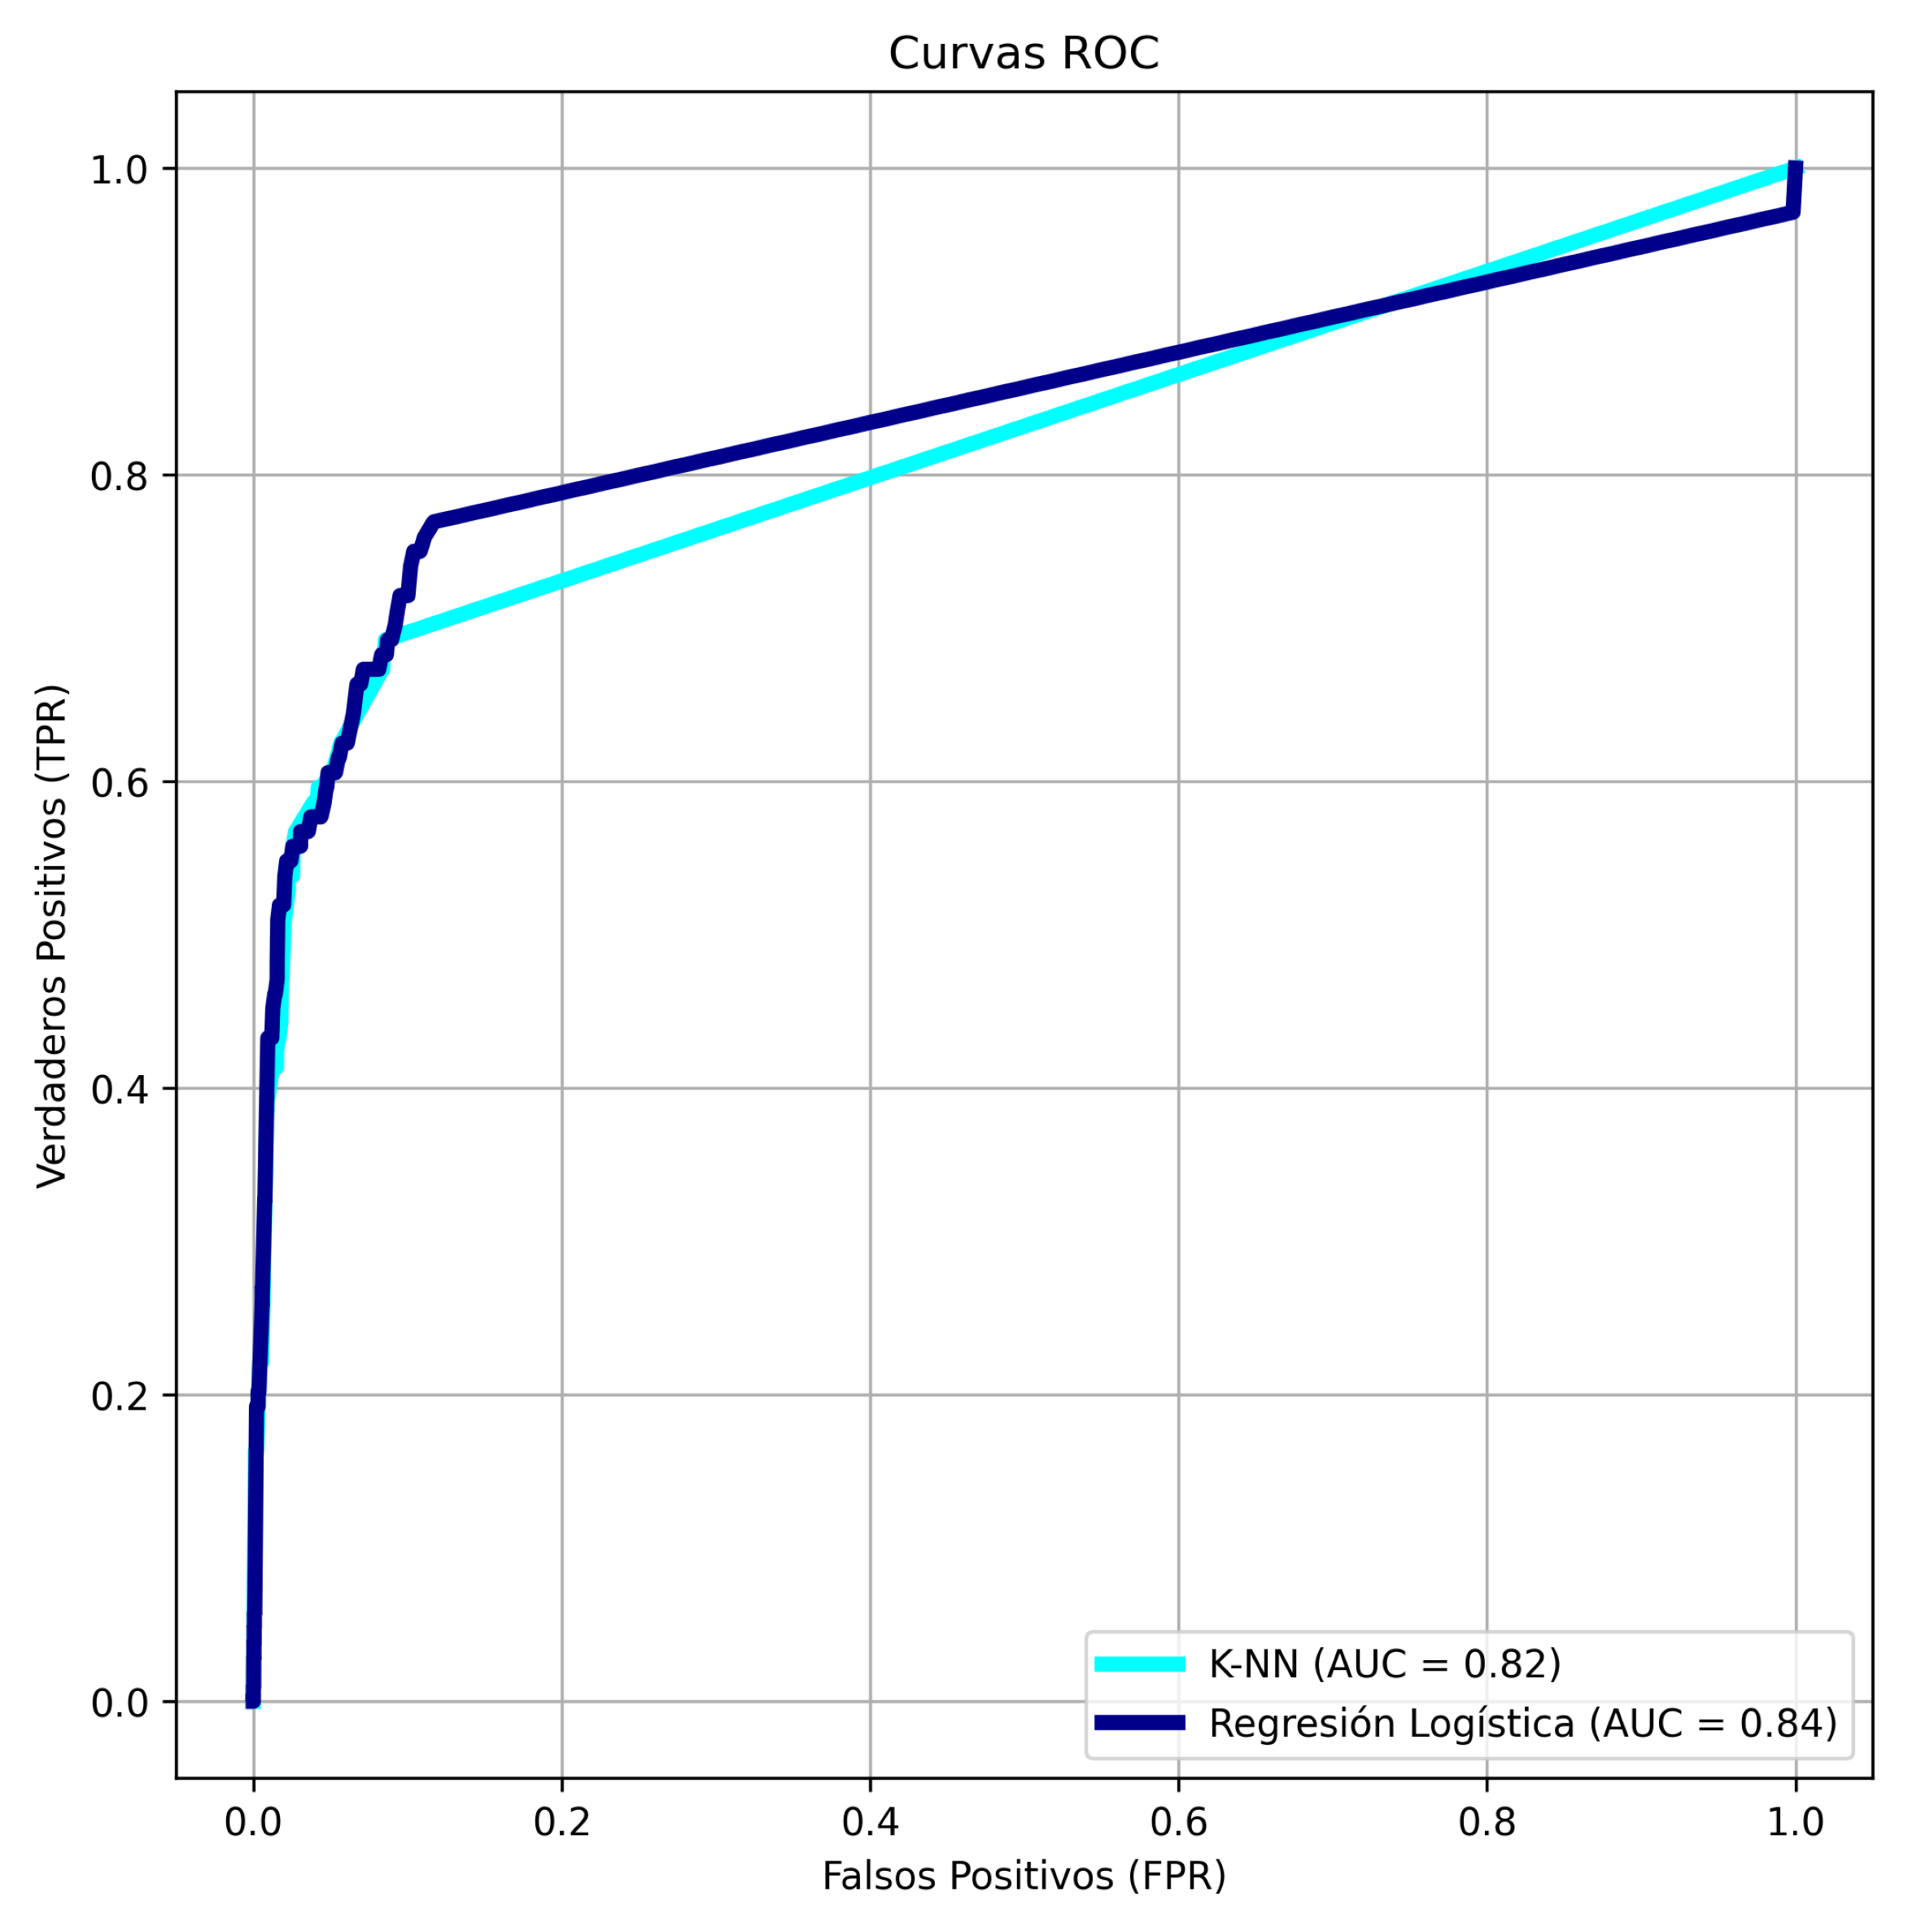

In [52]:
'''a, b, _ = roc_curve(bdr4.y_test, predict_knn1)
roc_auc_knn = roc_auc_score(bdr4.y_test, predict_knn1)
c, d, _ = roc_curve(bdr4.y_test, predict_log1)
roc_auc_log = roc_auc_score(bdr4.y_test, predict_log1)
plt.figure(figsize=(8, 8))
plt.plot(a, b, color = '#00FFFF', label = f'K-NN (AUC = {roc_auc_knn:.2f})', lw = 4)
plt.plot(c, d, color = '#00008B', label = f'Regresión Logística (AUC = {roc_auc_log:.2f})', lw = 4)
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('curva1.png', dpi=300, bbox_inches='tight')

plt.show()'''
plt.figure(figsize=(30, 80))  
img = mpimg.imread('documentos_ejercicio3\\curva2.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [53]:
df_concat = pd.concat([data_knn, data_log], ignore_index=True)
df_concat

Modelo  Precision    Recall  F1 Score   ROC AUC
0      Knn   1.000000  0.043103  0.082645  0.846602
1  Logsitc   0.588235  0.086207  0.150376  0.892700

En esta comparación de los modelos K-Nearest Neighbors (K-NN) y Regresión Logística, se observa que la Regresión Logística sigue siendo el modelo con mejor rendimiento global. Según las curvas ROC, el AUC para K-NN es de 0.85, mientras que el de Regresión Logística es de 0.89, lo que indica que la Regresión Logística tiene una mayor capacidad de discriminación entre las clases.

En cuanto a las métricas, el modelo K-NN muestra una precisión muy alta de 1.0, pero esto puede estar relacionado con un fuerte sesgo hacia la clase mayoritaria, ya que su valor de recall es extremadamente bajo (0.043). Este comportamiento indica que K-NN no está capturando bien los verdaderos positivos, a pesar de tener una alta precisión. La puntuación F1 también es baja (0.082), lo que refleja este desequilibrio en el rendimiento del modelo.

## Modelos para proteina 'HSA'

In [54]:
'''hsa = pd.read_parquet('hsa_train.parquet')'''

"hsa = pd.read_parquet('hsa_train.parquet')"

In [55]:
'''hsa = Data(hsa)'''

'hsa = Data(hsa)'

### KNN - 'HSA'

In [56]:
'''pipeline_knn_hsa = Pipeline([('scaler', StandardScaler()), ('clasificador', KNeighborsClassifier())])
param_grid_knn_hsa = [{ 'clasificador__n_neighbors': range(2 , 100), 'clasificador__weights': ['distance']}]
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)
grid_knn_hsa = GridSearchCV(pipeline_knn_hsa, param_grid_knn_hsa, cv = kf, scoring = 'roc_auc')
grid_knn_hsa.fit(hsa.X_train, hsa.y_train)
print("Mejor parámetro:", grid_knn_hsa.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ",grid_knn_hsa.best_score_)'''

'pipeline_knn_hsa = Pipeline([(\'scaler\', StandardScaler()), (\'clasificador\', KNeighborsClassifier())])\nparam_grid_knn_hsa = [{ \'clasificador__n_neighbors\': range(2 , 100), \'clasificador__weights\': [\'distance\']}]\nkf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)\ngrid_knn_hsa = GridSearchCV(pipeline_knn_hsa, param_grid_knn_hsa, cv = kf, scoring = \'roc_auc\')\ngrid_knn_hsa.fit(hsa.X_train, hsa.y_train)\nprint("Mejor parámetro:", grid_knn_hsa.best_params_)\nprint("Mejor AUC en conjunto de entrenamiento: ",grid_knn_hsa.best_score_)'

Mejor parámetro: {'clasificador__n_neighbors': 99, 'clasificador__weights': 'distance'} \
Mejor AUC en conjunto de entrenamiento:  0.8285928165993697

In [57]:
'''predict_knn_hsa = grid_knn_hsa.predict_proba(hsa.X_test)[:, 1]
auc_hsa = roc_auc_score(hsa.y_test, predict_knn_hsa)
print("BEST AUC", auc_hsa)'''

'predict_knn_hsa = grid_knn_hsa.predict_proba(hsa.X_test)[:, 1]\nauc_hsa = roc_auc_score(hsa.y_test, predict_knn_hsa)\nprint("BEST AUC", auc_hsa)'

BEST AUC 0.8205461643513942

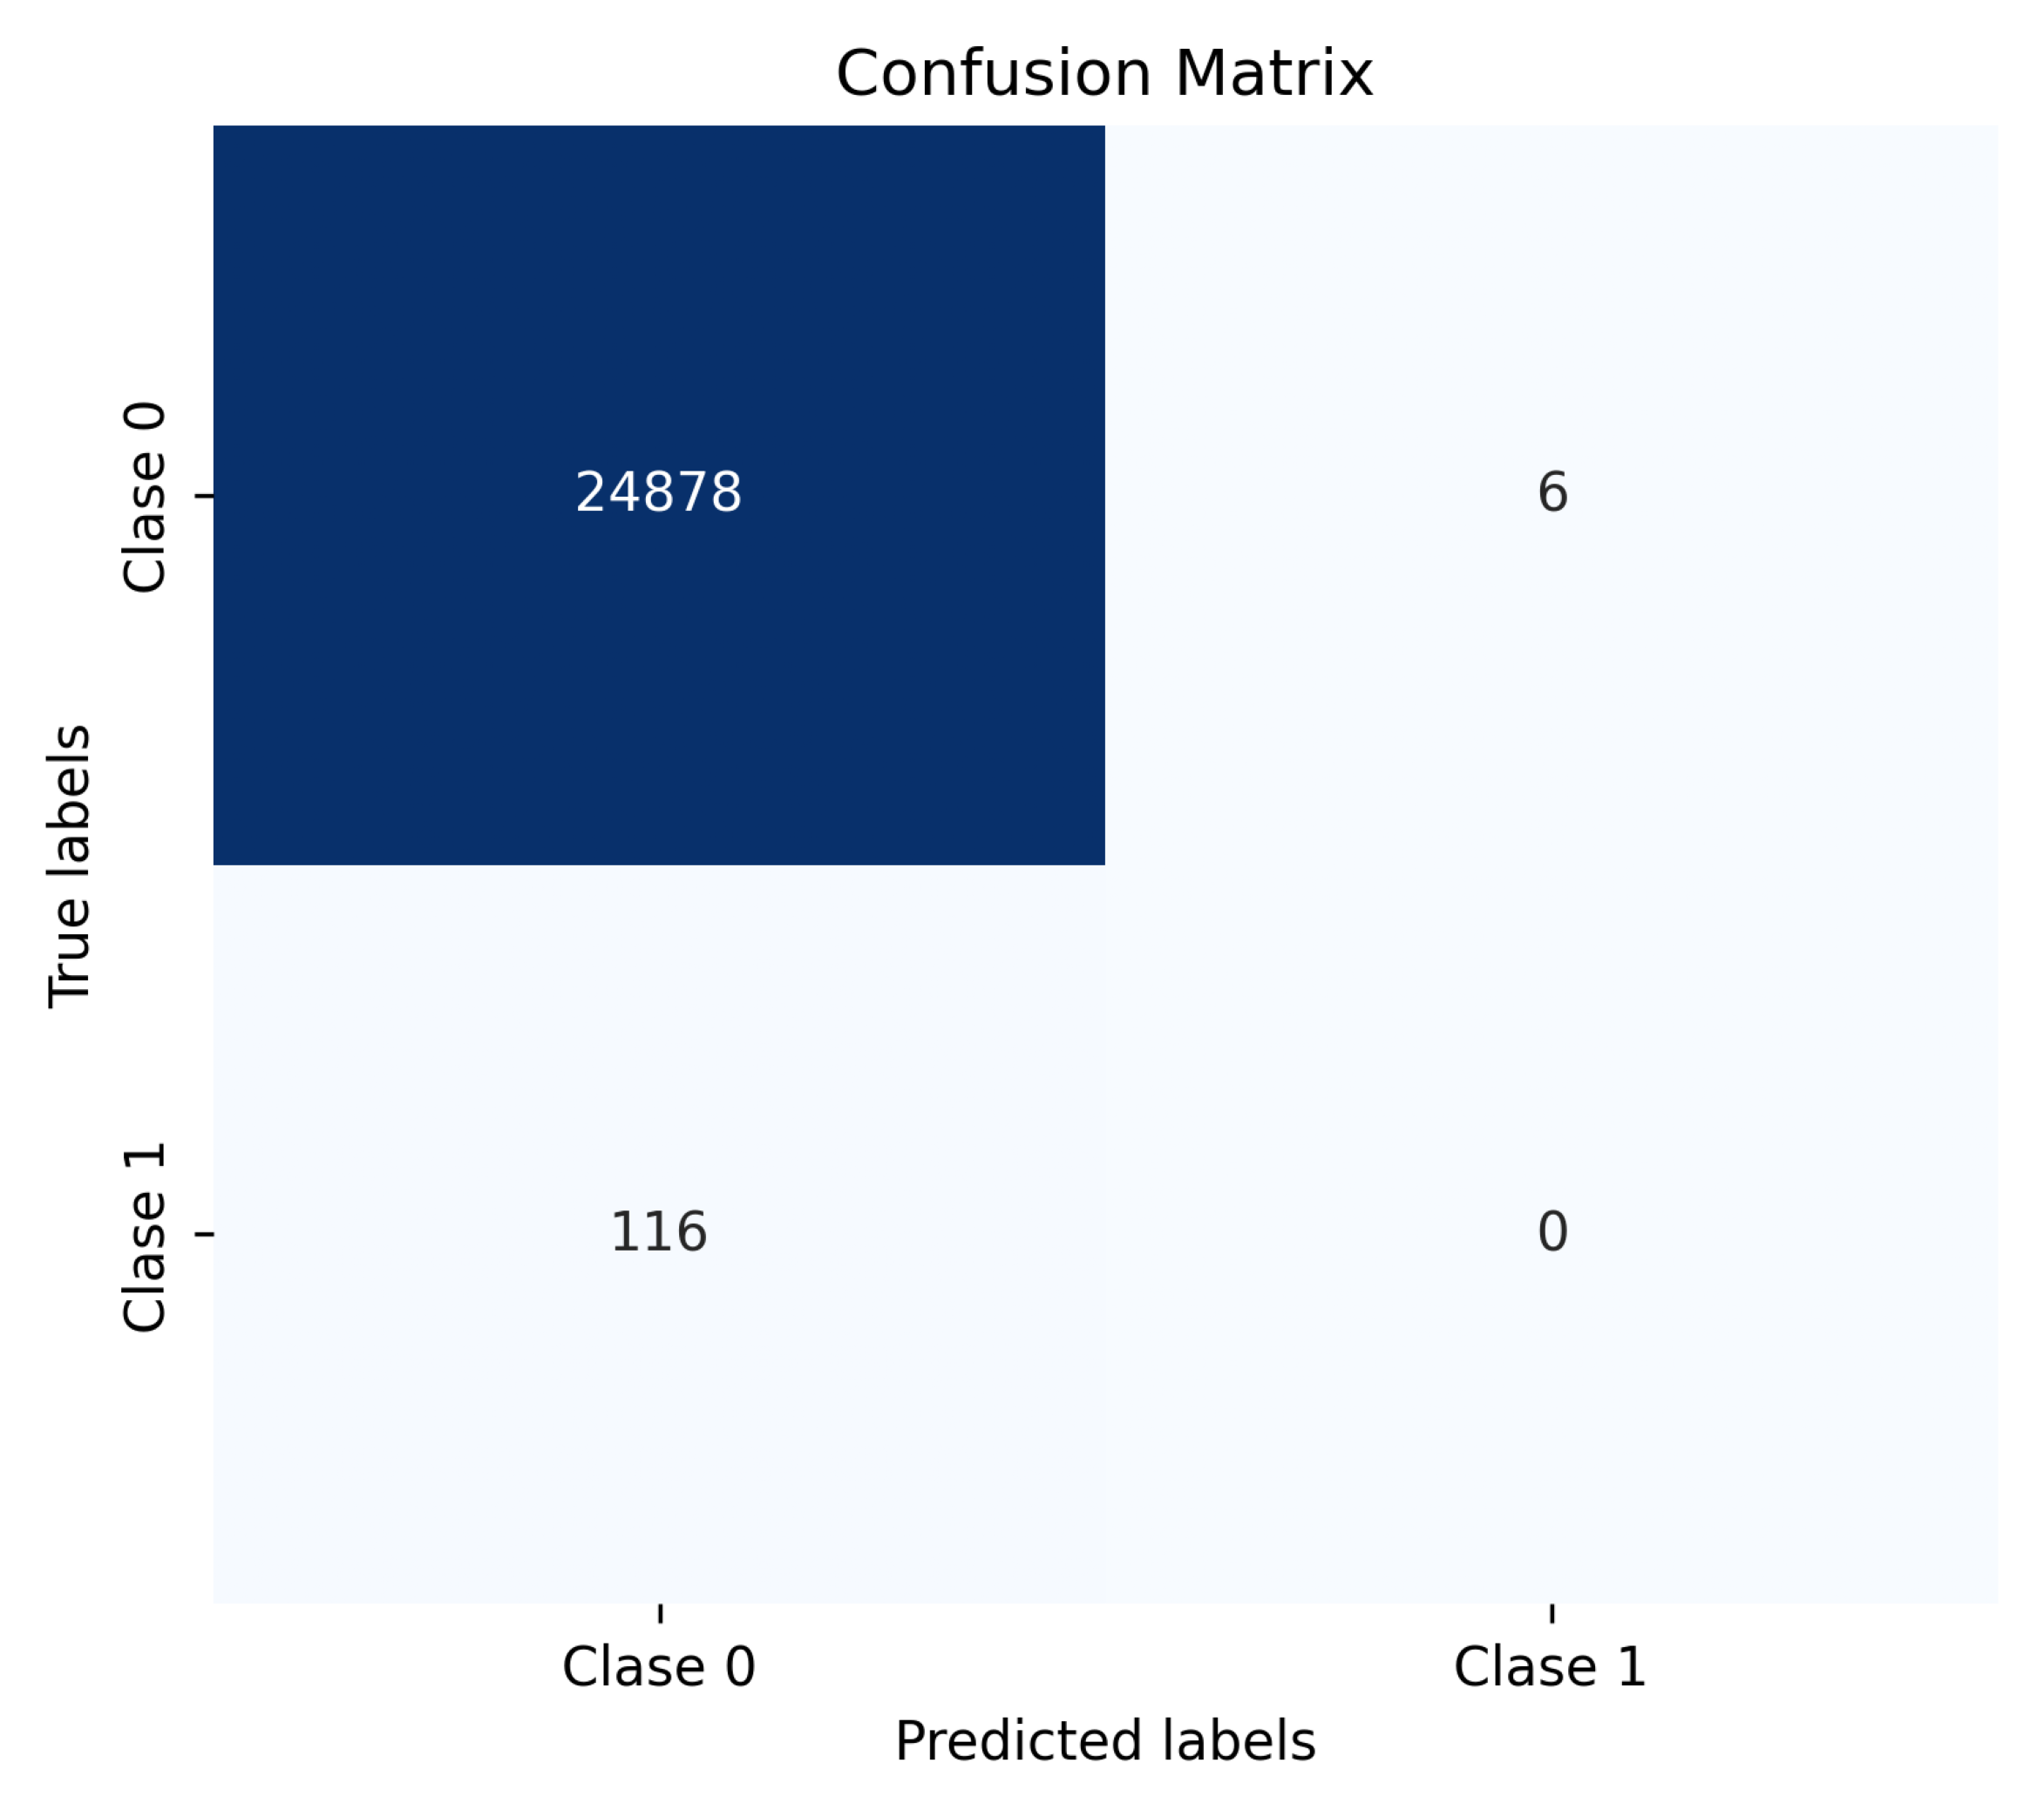

In [58]:
'''y_pred = (predict_knn_hsa > 0.5).astype(int)
cm_hsa1 = confusion_matrix(hsa.y_test, y_pred)
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.savefig('conf2_1.png', dpi=300, bbox_inches='tight')
    plt.show()'''
plt.figure(figsize=(30, 80))  
img = mpimg.imread('documentos_ejercicio3\\conf2_1.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [59]:
'''data = {
    'Modelo': ['Knn'],
    'Precision': [
        precision_score(hsa.y_test, y_pred)
    ],
    'Recall': [
        recall_score(hsa.y_test, y_pred)
    ],
    'F1 Score': [

        f1_score(hsa.y_test, y_pred)
    ],
    'ROC AUC': [
        roc_auc_score(hsa.y_test,predict_knn_hsa)
    ]
}'''
data = {'Modelo': ['Knn'],'Precision': [0.33],'Recall': [0.0192],'F1 Score': [0.0363],'ROC AUC': [ 0.8205]}
data_knn = pd.DataFrame(data)
data_knn

Modelo  Precision  Recall  F1 Score  ROC AUC
0    Knn       0.33  0.0192    0.0363   0.8205

### Logistic - 'HSA'

In [60]:
'''pipeline_log_hsa = Pipeline([('scaler', StandardScaler()), ('clasificador', LogisticRegression())])
param_grid_log_hsa = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)
grid_log_hsa = GridSearchCV(pipeline_log_hsa, param_grid_log_hsa, cv = kf, scoring = 'roc_auc')
grid_log_hsa.fit(hsa.X_train, hsa.y_train)
print("Mejor parámetro:", grid_log_hsa.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ", grid_log_hsa.best_score_)'''

'pipeline_log_hsa = Pipeline([(\'scaler\', StandardScaler()), (\'clasificador\', LogisticRegression())])\nparam_grid_log_hsa = {\'clasificador__C\': [0.01, 0.1, 1, 10, 100, 1000]}\nkf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)\ngrid_log_hsa = GridSearchCV(pipeline_log_hsa, param_grid_log_hsa, cv = kf, scoring = \'roc_auc\')\ngrid_log_hsa.fit(hsa.X_train, hsa.y_train)\nprint("Mejor parámetro:", grid_log_hsa.best_params_)\nprint("Mejor AUC en conjunto de entrenamiento: ", grid_log_hsa.best_score_)'

Mejor parámetro: {'clasificador__C': 0.01}
Mejor AUC en conjunto de entrenamiento:  0.8832779175332582

In [61]:
'''y_pred = grid_log_hsa.predict(hsa.X_test)
predict_log_hsa = grid_log_hsa.predict_proba(hsa.X_test)[:, 1]
auc_hsa = roc_auc_score(hsa.y_test, predict_log_hsa)
print("BEST AUC", auc_hsa)'''

'y_pred = grid_log_hsa.predict(hsa.X_test)\npredict_log_hsa = grid_log_hsa.predict_proba(hsa.X_test)[:, 1]\nauc_hsa = roc_auc_score(hsa.y_test, predict_log_hsa)\nprint("BEST AUC", auc_hsa)'

BEST AUC 0.8390135656639313

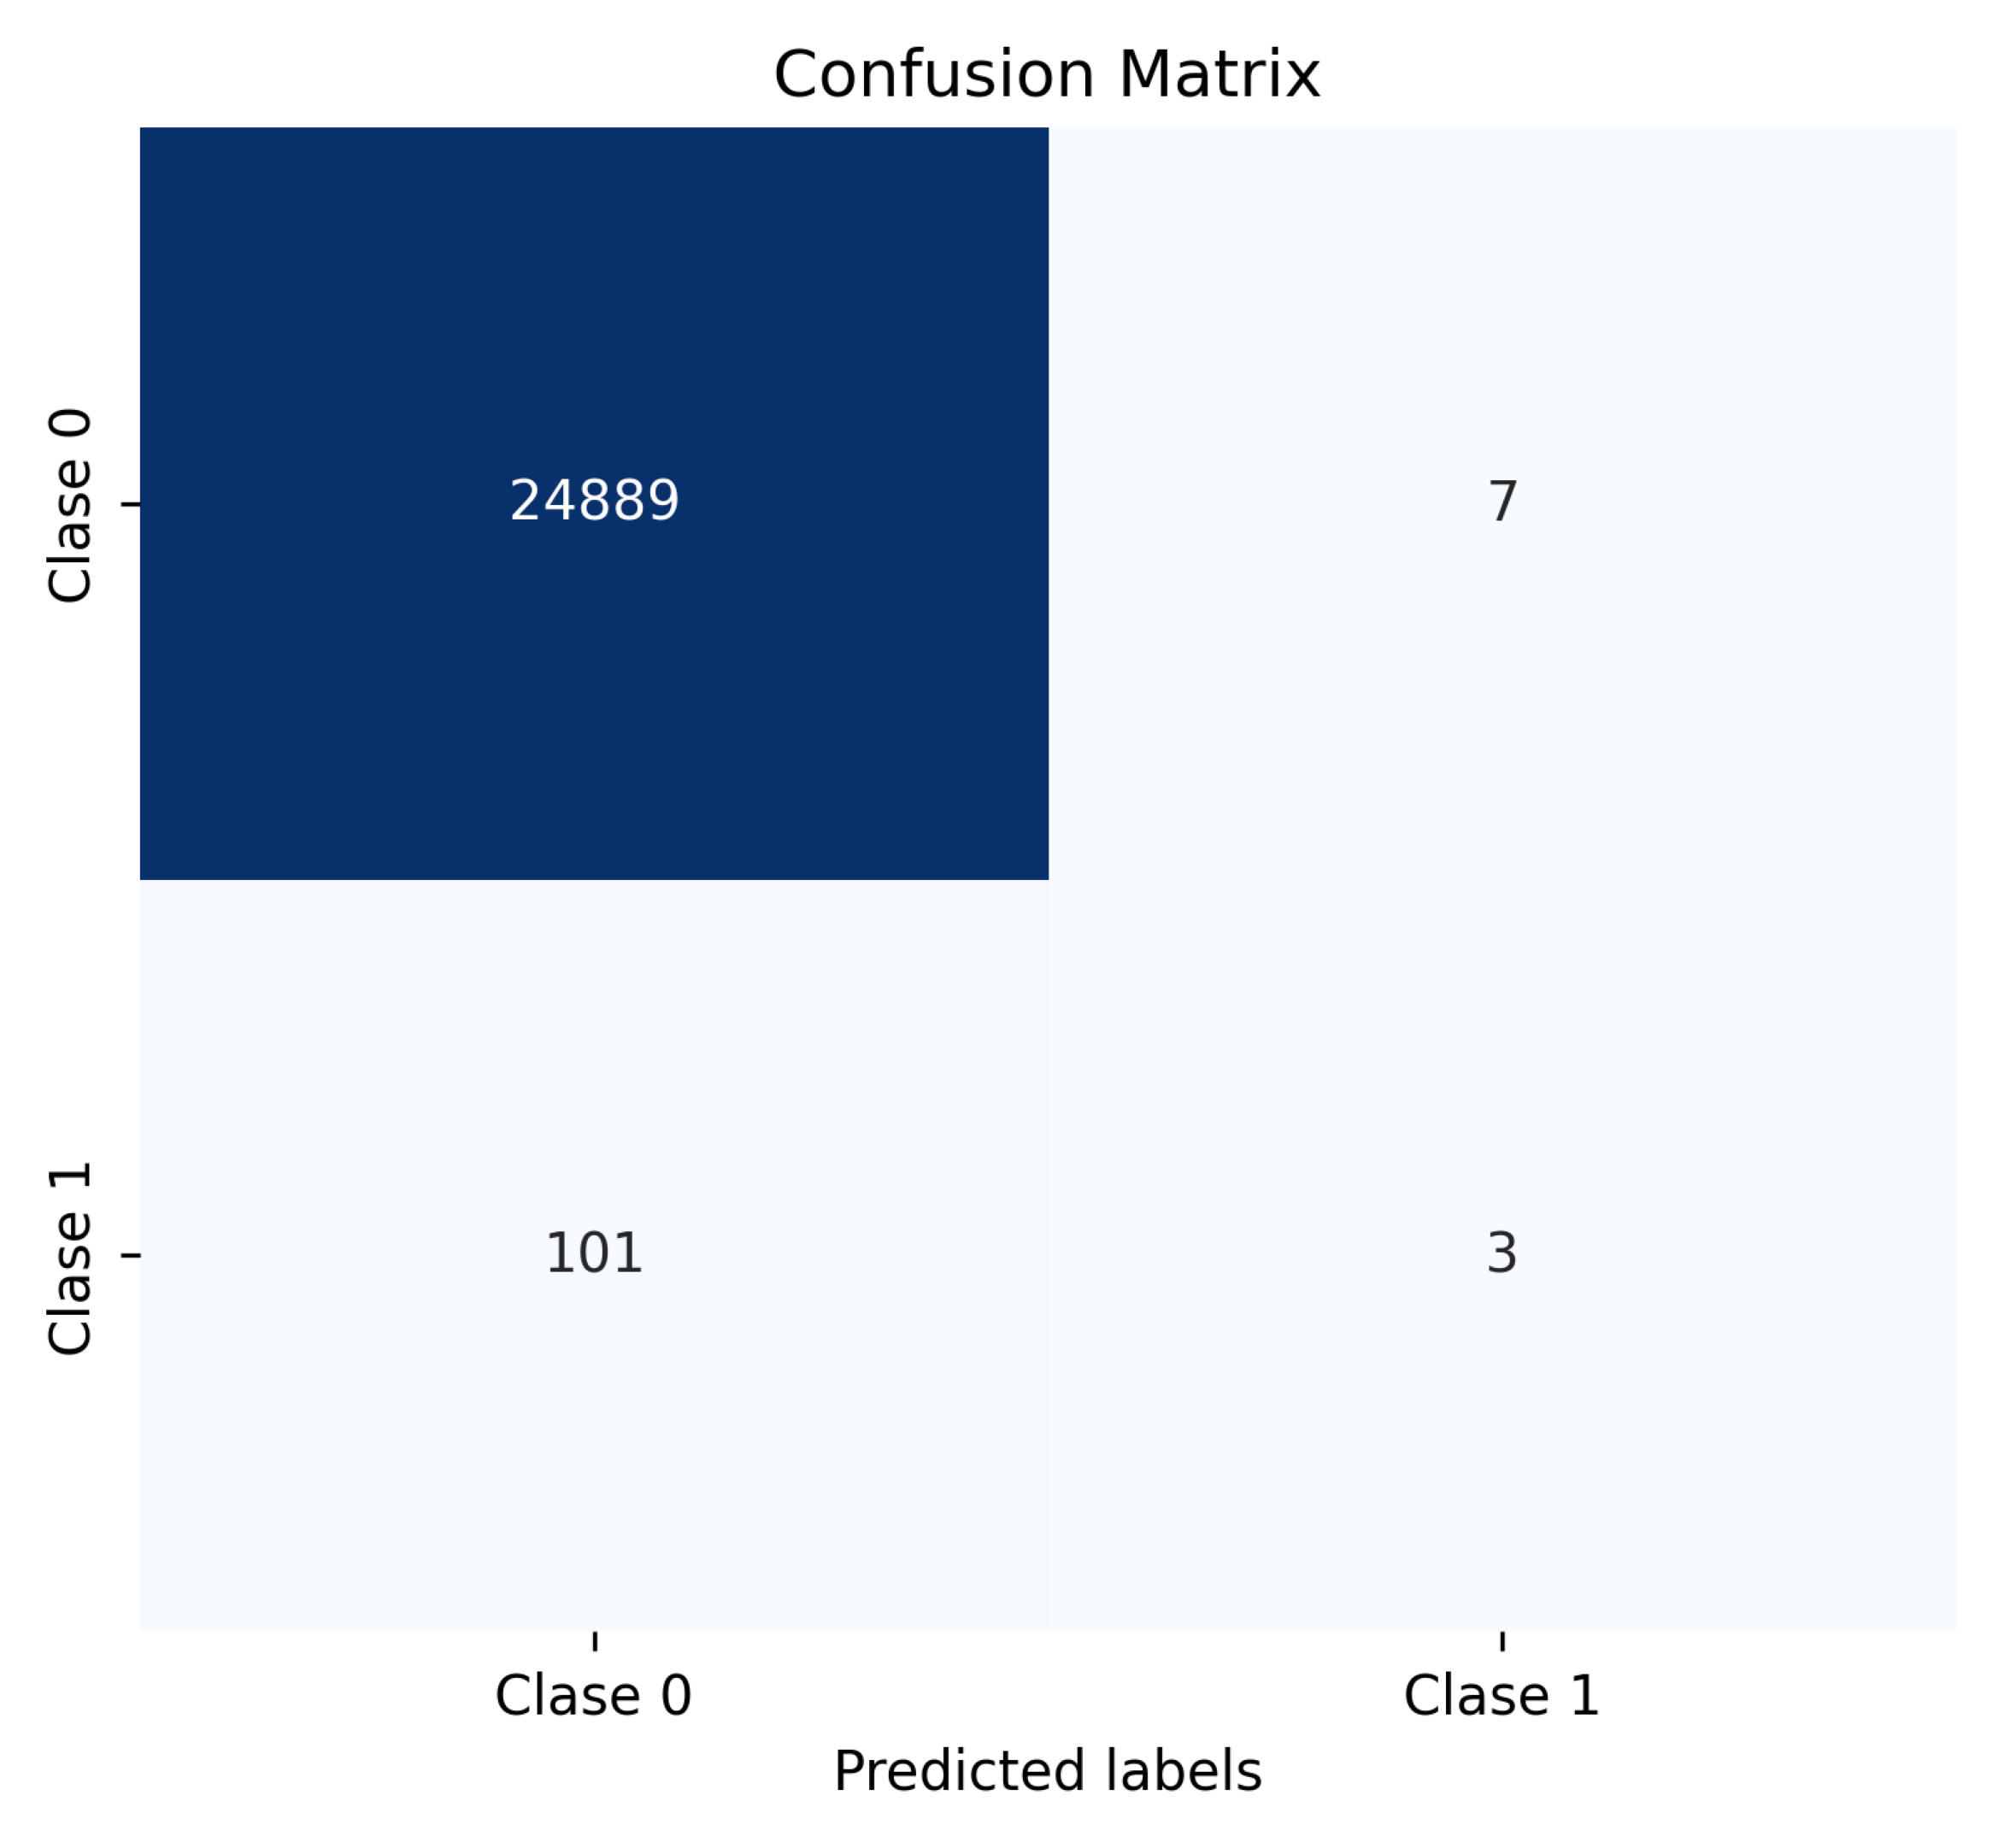

In [62]:
'''y_pred = (predict_log_hsa > 0.5).astype(int)
coo_matrix = confusion_matrix(hsa.y_test, y_pred)
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.savefig('conf2_2.png', dpi=300, bbox_inches='tight')
    plt.ylabel('True labels')
    plt.show()
cm2 = np.array(coo_matrix)
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm2, class_names)
print(cm2)'''
plt.figure(figsize=(30, 80))  
img = mpimg.imread('documentos_ejercicio3\\conf2_2.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [63]:
'''data = {
    'Modelo': ['Logsitc'],
    'Precision': [
        precision_score(hsa.y_test, y_pred)
    ],
    'Recall': [
        recall_score(hsa.y_test, y_pred)
    ],
    'F1 Score': [

        f1_score(hsa.y_test, y_pred)
    ],
    'ROC AUC': [
        roc_auc_score(hsa.y_test, predict_log_hsa)
    ]
}'''
data = {'Modelo': ['Logsitc'],'Precision': [0.3],'Recall': [0.0028],'F1 Score': [0.0562],'ROC AUC': [0.8390  ]}
data_log = pd.DataFrame(data)
data_log

Modelo  Precision  Recall  F1 Score  ROC AUC
0  Logsitc        0.3  0.0028    0.0562    0.839

### Curva ROC - 'HSA'

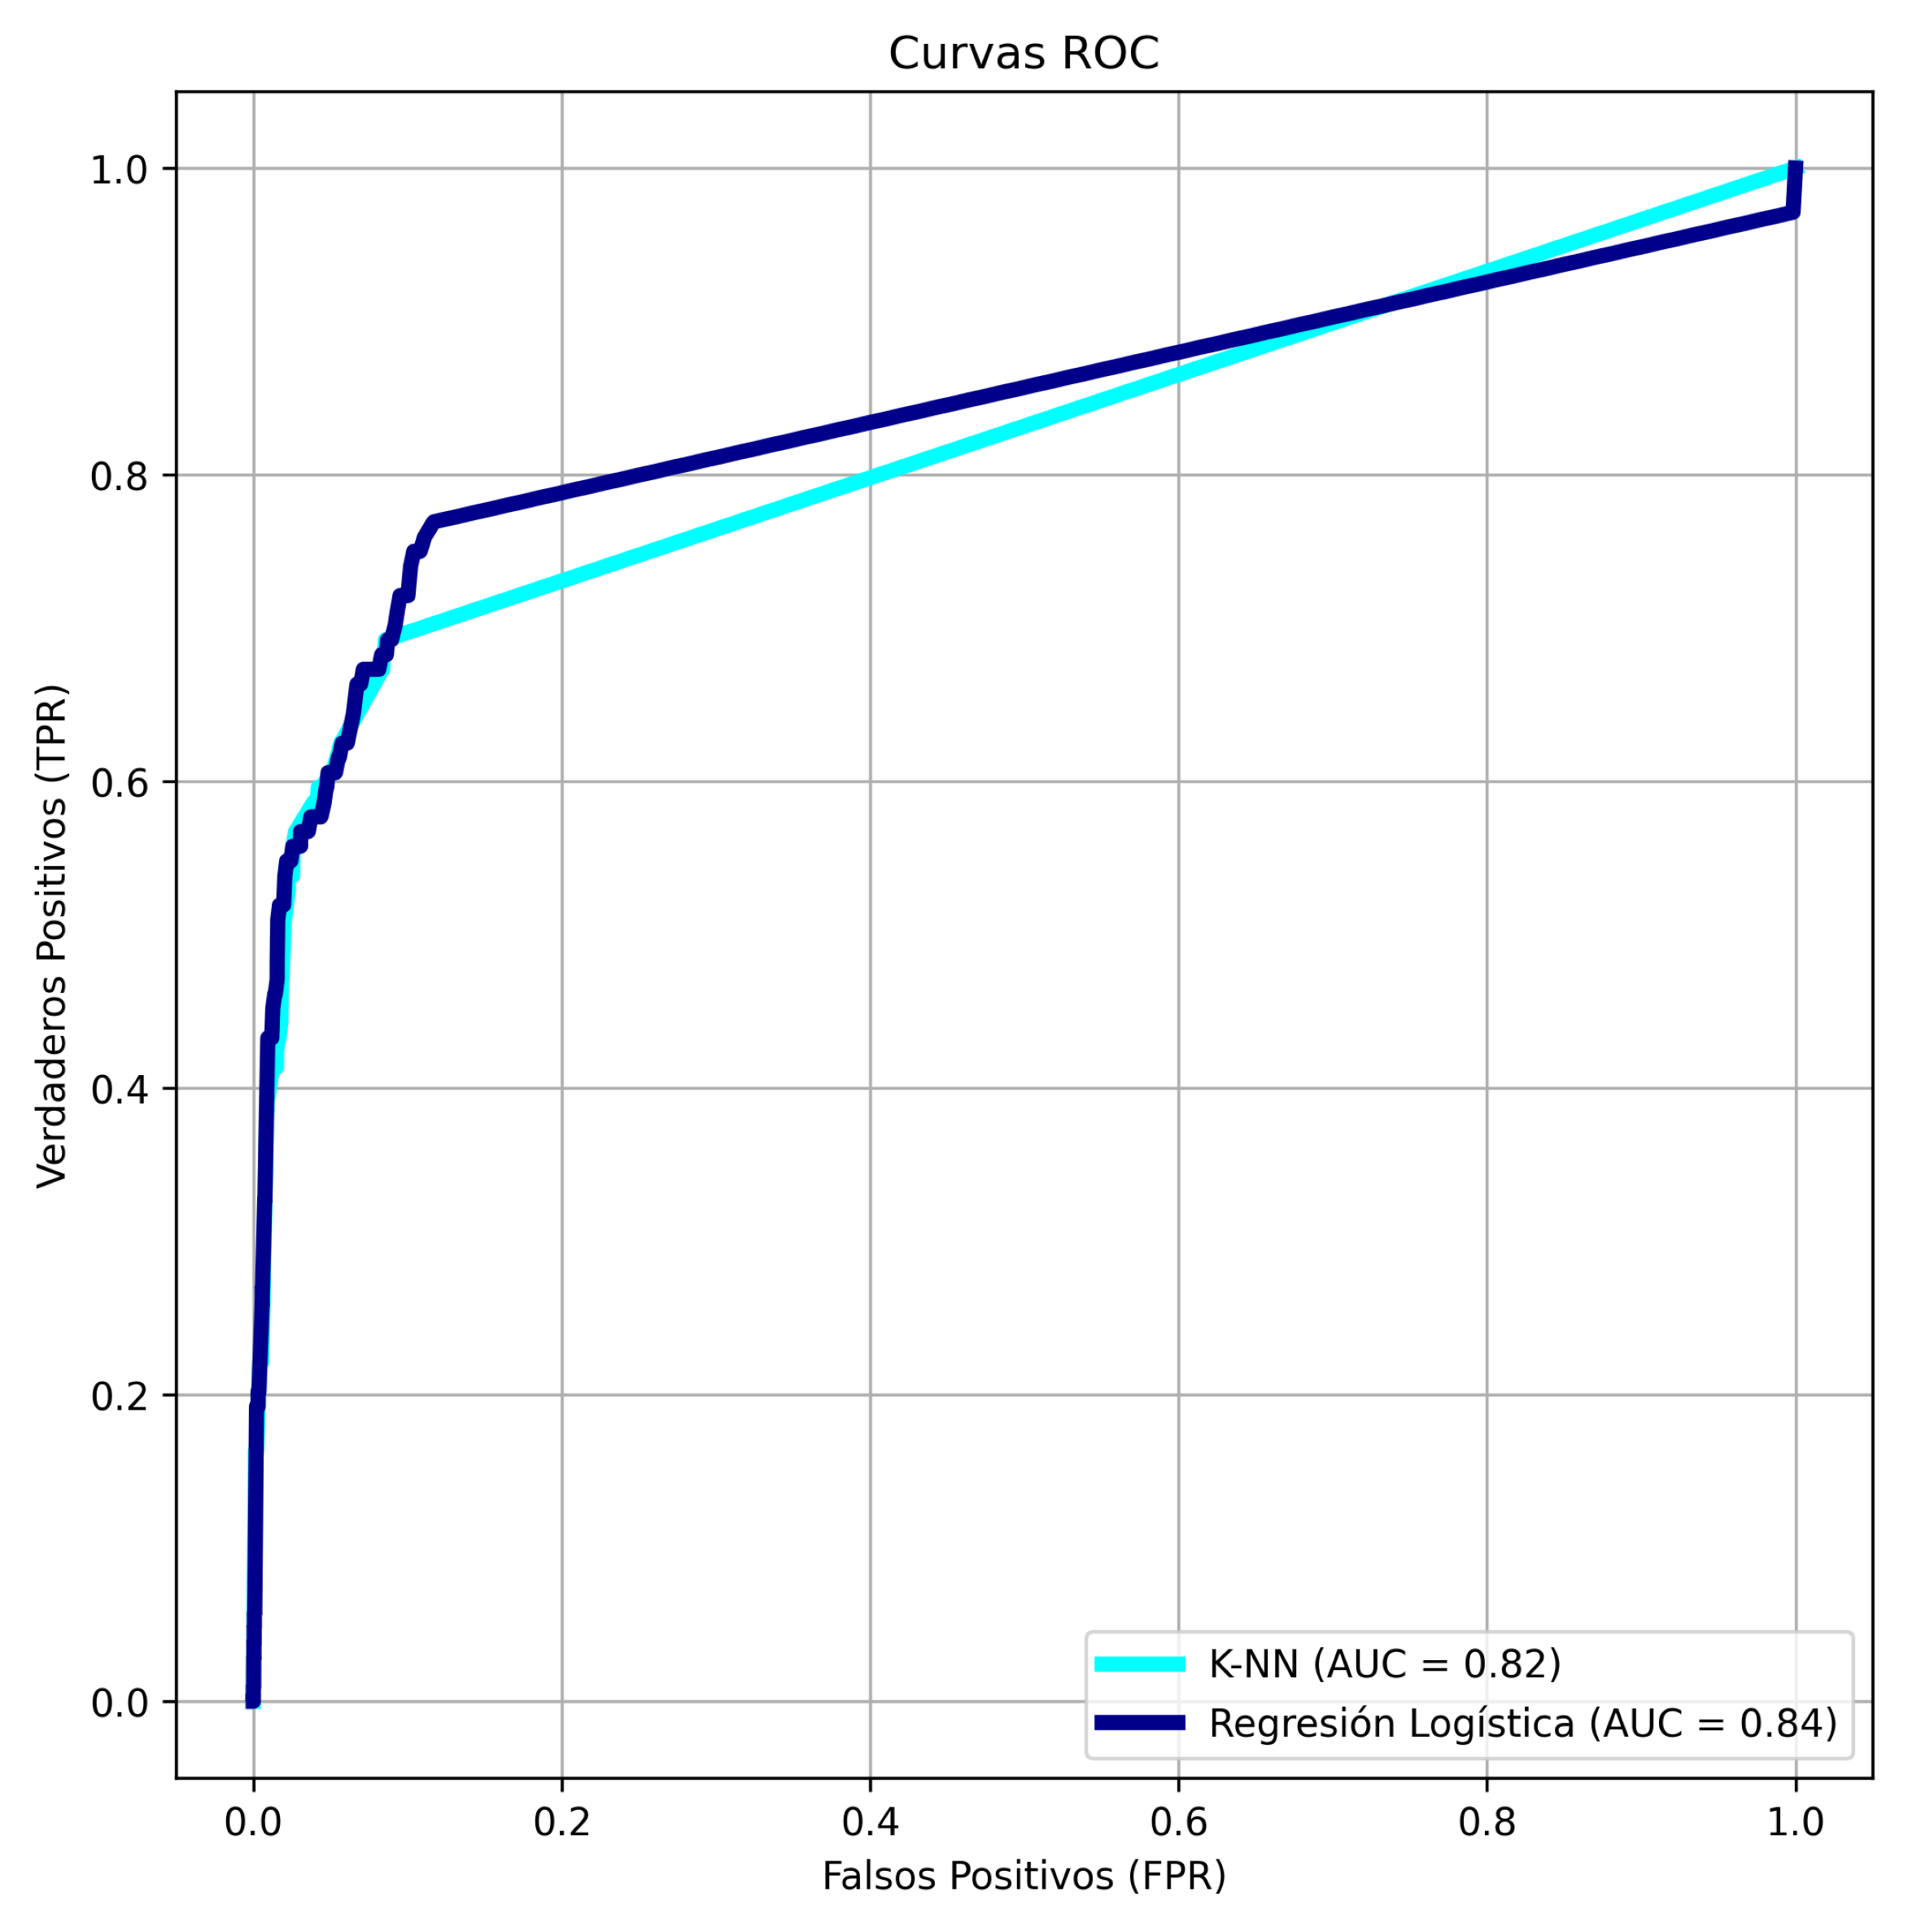

In [64]:
'''a, b, _ = roc_curve(hsa.y_test, predict_knn_hsa)
roc_auc_knn = roc_auc_score(hsa.y_test, predict_knn_hsa)
c, d, _ = roc_curve(hsa.y_test, predict_log_hsa)
roc_auc_log = roc_auc_score(hsa.y_test, predict_log_hsa)
plt.figure(figsize=(8, 8))
plt.plot(a, b, color = '#00FFFF', label = f'K-NN (AUC = {roc_auc_knn:.2f})', lw = 4)
plt.plot(c, d, color = '#00008B', label = f'Regresión Logística (AUC = {roc_auc_log:.2f})', lw = 4)
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('curva2.png', dpi=300, bbox_inches='tight')

plt.show()'''
plt.figure(figsize=(30, 80))  
img = mpimg.imread('documentos_ejercicio3\\curva2.png')
plt.imshow(img)
plt.axis('off')  
plt.show()


In [65]:
df_concat = pd.concat([data_knn, data_log], ignore_index=True)
df_concat

Modelo  Precision  Recall  F1 Score  ROC AUC
0      Knn       0.33  0.0192    0.0363   0.8205
1  Logsitc       0.30  0.0028    0.0562   0.8390

En los resultados obtenidos, se comparan los modelos de K-Nearest Neighbors (K-NN) y la Regresión Logística mediante la curva ROC y varias métricas de evaluación. La curva ROC muestra que ambos modelos tienen un rendimiento decente en términos de discriminación entre clases. El área bajo la curva (AUC) para el modelo K-NN es de 0.82, mientras que el modelo de Regresión Logística presenta un AUC ligeramente superior de 0.84, lo que indica una mejor capacidad de predicción para este último.

## Modelos para proteina 'sEH'

In [66]:
'''seh = Data(pd.read_parquet('seh_train.parquet'))'''

"seh = Data(pd.read_parquet('seh_train.parquet'))"

### KNN - 'sEH'

In [67]:
'''pipeline_knn_seh = Pipeline([('scaler', StandardScaler()), ('clasificador', KNeighborsClassifier())])
param_grid_knn_seh = [{ 'clasificador__n_neighbors': range(2 , 100), 'clasificador__weights': ['distance']}]
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)
grid_knn_seh = GridSearchCV(pipeline_knn_seh, param_grid_knn_seh, cv = kf, scoring = 'roc_auc')
grid_knn_seh.fit(seh.X_train, seh.y_train)
print("Mejor parámetro:", grid_knn_hsa.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ",grid_knn_seh.best_score_)'''

'pipeline_knn_seh = Pipeline([(\'scaler\', StandardScaler()), (\'clasificador\', KNeighborsClassifier())])\nparam_grid_knn_seh = [{ \'clasificador__n_neighbors\': range(2 , 100), \'clasificador__weights\': [\'distance\']}]\nkf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)\ngrid_knn_seh = GridSearchCV(pipeline_knn_seh, param_grid_knn_seh, cv = kf, scoring = \'roc_auc\')\ngrid_knn_seh.fit(seh.X_train, seh.y_train)\nprint("Mejor parámetro:", grid_knn_hsa.best_params_)\nprint("Mejor AUC en conjunto de entrenamiento: ",grid_knn_seh.best_score_)'

Mejor parámetro: {'clasificador__n_neighbors': 99, 'clasificador__weights': 'distance'}
Mejor AUC en conjunto de entrenamiento:  0.7062024516199912

In [68]:
'''predict_knn_seh = grid_knn_seh.predict_proba(seh.X_test)[:, 1]
auc_seh = roc_auc_score(seh.y_test, predict_knn_seh)
print("BEST AUC", auc_seh)'''

'predict_knn_seh = grid_knn_seh.predict_proba(seh.X_test)[:, 1]\nauc_seh = roc_auc_score(seh.y_test, predict_knn_seh)\nprint("BEST AUC", auc_seh)'

Mejor parámetro: {'clasificador__n_neighbors': 99, 'clasificador__weights': 'distance'}
Mejor AUC en conjunto de entrenamiento:  0.7062024516199912

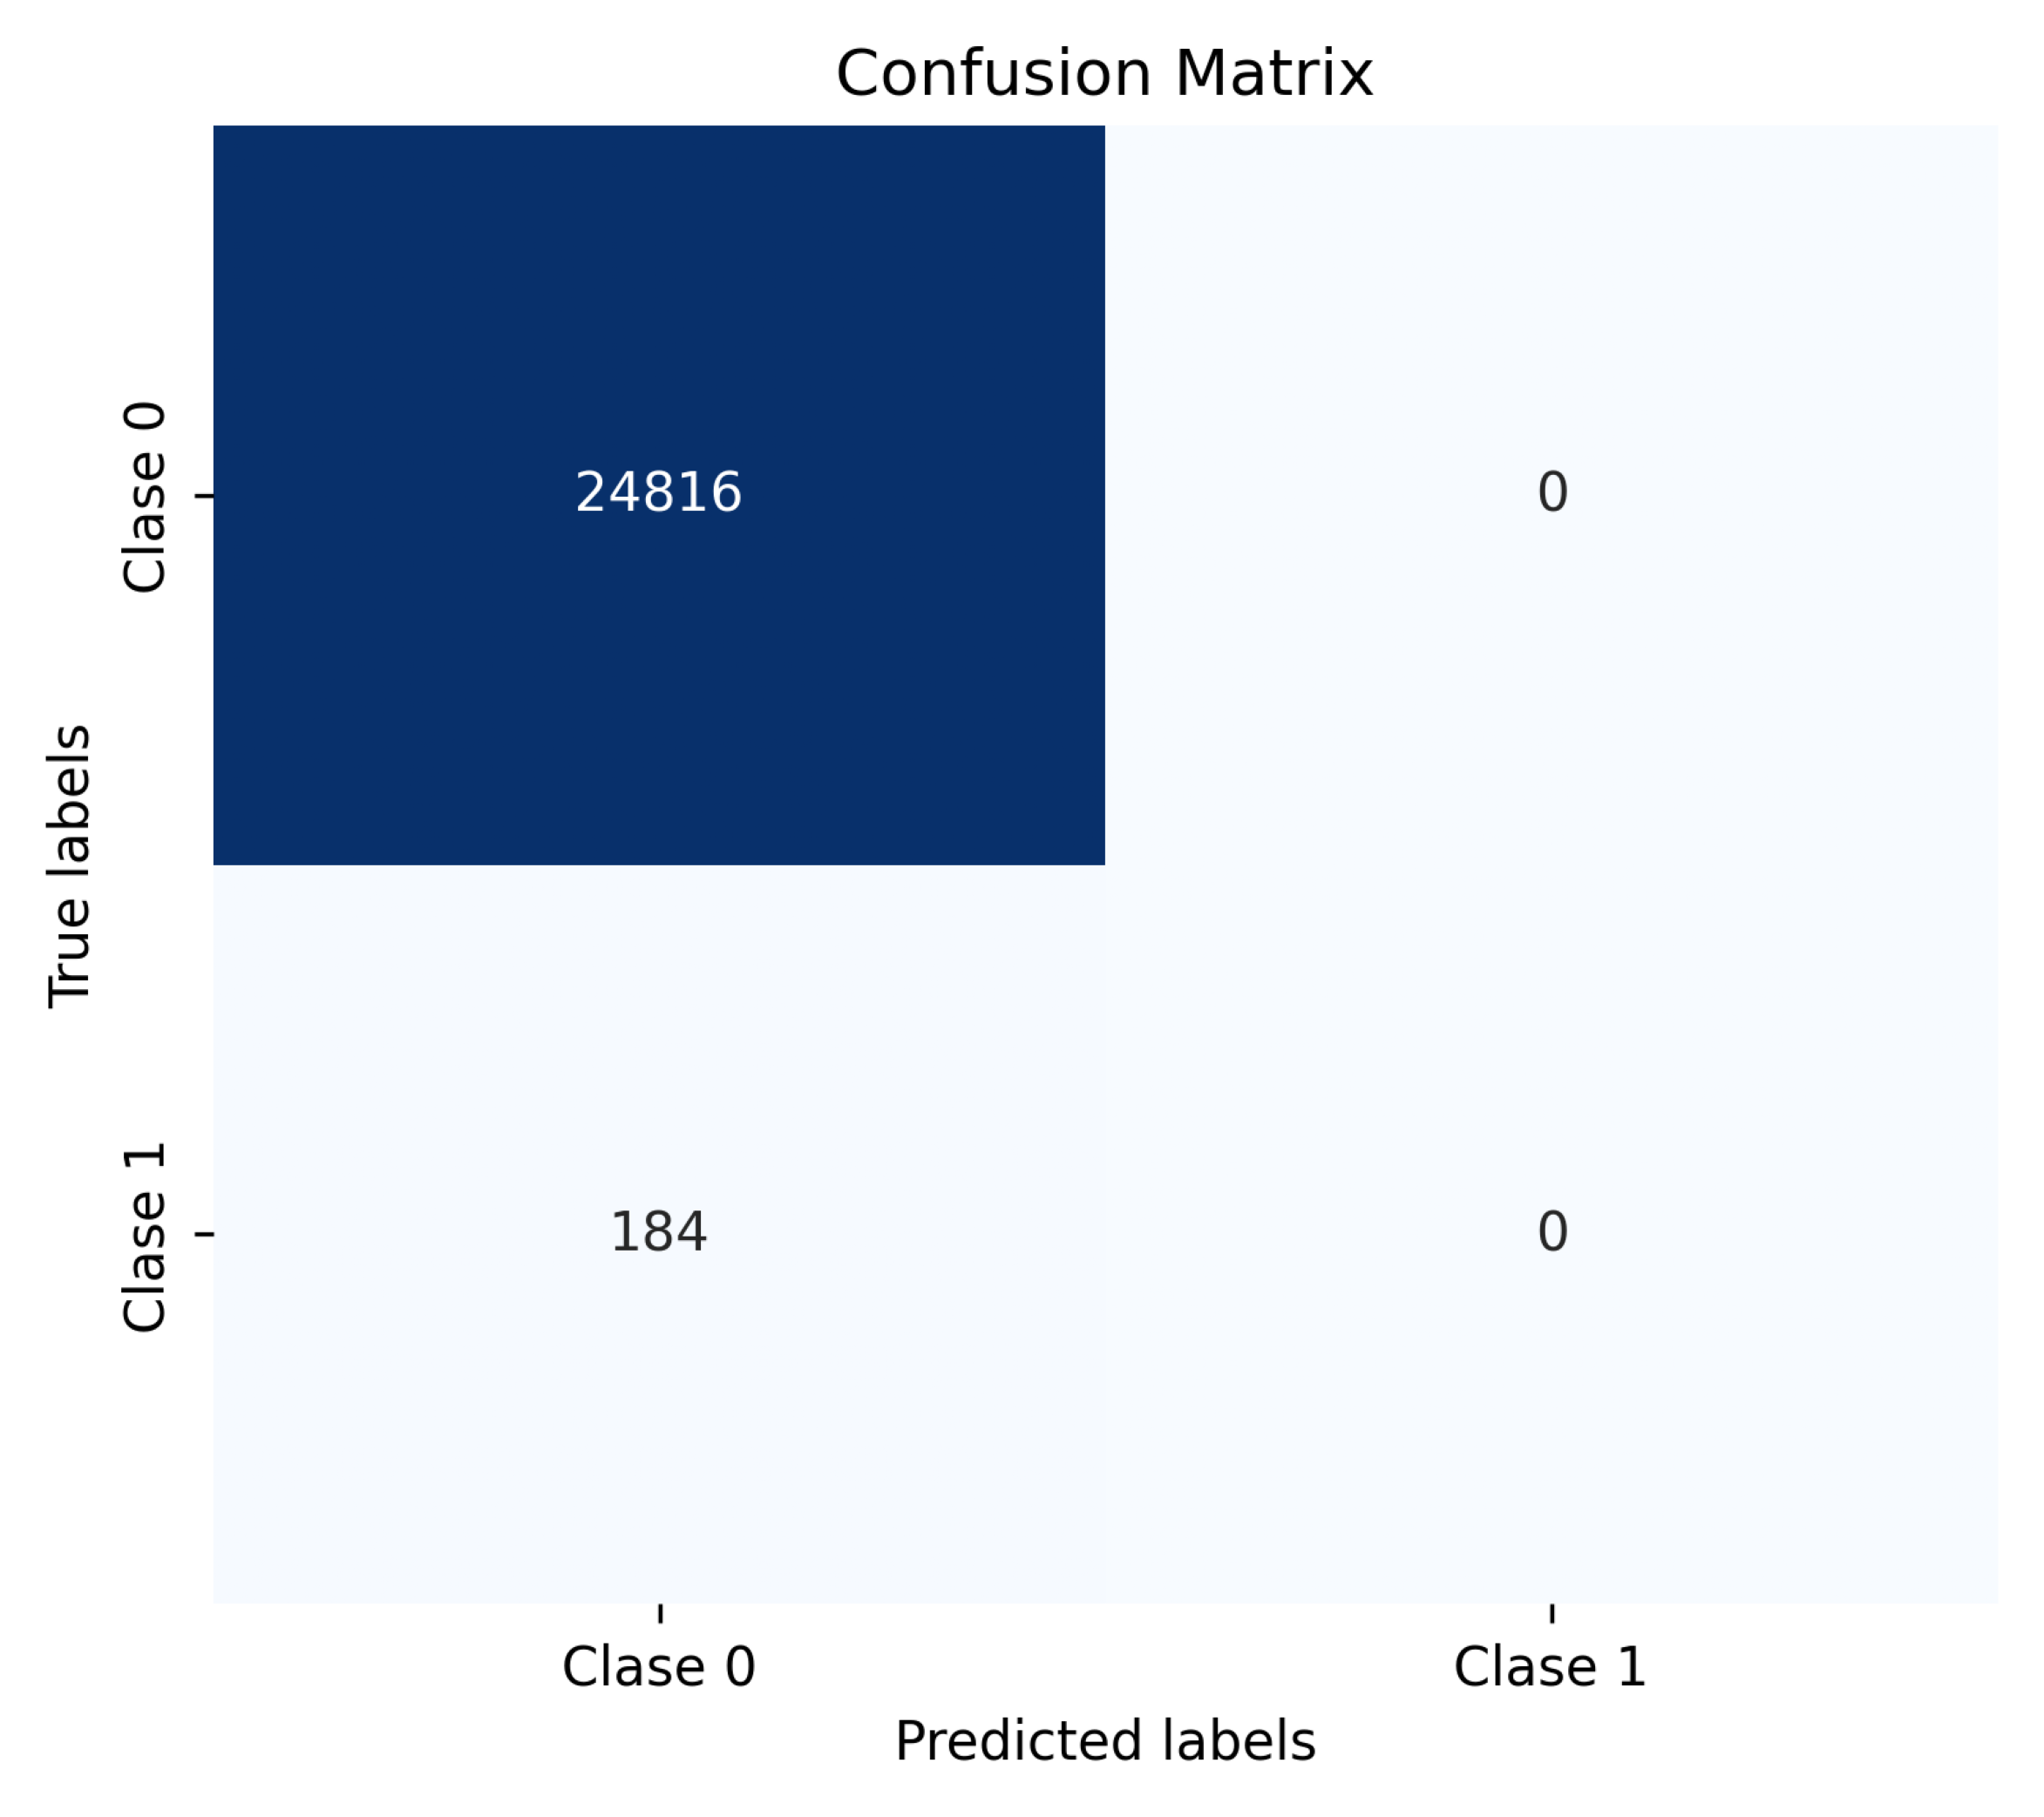

In [69]:
'''y_pred = (predict_knn_seh > 0.5).astype(int)
cm_seh  = confusion_matrix(seh.y_test, y_pred)
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.savefig('conf3_1.png', dpi=300, bbox_inches='tight')
    plt.show()
cm1 = np.array(cm_seh )
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm1, class_names)
print(cm1)'''
plt.figure(figsize=(30, 80))  
img = mpimg.imread('documentos_ejercicio3\\conf3_1.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [70]:
'''data = {
    'Modelo': ['Knn'],
    'Precision': [
        precision_score(seh.y_test, y_pred)
    ],
    'Recall': [
        recall_score(seh.y_test, y_pred)
    ],
    'F1 Score': [
        f1_score(seh.y_test, y_pred)
    ],
    'ROC AUC': [
        roc_auc_score(seh.y_test,predict_knn_seh)
    ]
}'''
data = {'Modelo': ['Knn'],'Precision': [0],'Recall': [0],'F1 Score': [0],'ROC AUC': [0.6905]}
data_knn = pd.DataFrame(data)
data_knn

Modelo  Precision  Recall  F1 Score  ROC AUC
0    Knn          0       0         0   0.6905

### Logistic - 'sEH'

In [71]:
'''pipeline_log_seh = Pipeline([('scaler', StandardScaler()), ('clasificador', LogisticRegression())])
param_grid_log_seh = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)
grid_log_seh = GridSearchCV(pipeline_log_seh, param_grid_log_seh, cv = kf, scoring = 'roc_auc')
grid_log_seh.fit(seh.X_train, seh.y_train)
print("Mejor parámetro:", grid_log_seh.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ", grid_log_seh.best_score_)'''

'pipeline_log_seh = Pipeline([(\'scaler\', StandardScaler()), (\'clasificador\', LogisticRegression())])\nparam_grid_log_seh = {\'clasificador__C\': [0.01, 0.1, 1, 10, 100, 1000]}\nkf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)\ngrid_log_seh = GridSearchCV(pipeline_log_seh, param_grid_log_seh, cv = kf, scoring = \'roc_auc\')\ngrid_log_seh.fit(seh.X_train, seh.y_train)\nprint("Mejor parámetro:", grid_log_seh.best_params_)\nprint("Mejor AUC en conjunto de entrenamiento: ", grid_log_seh.best_score_)'

Mejor parámetro: {'clasificador__C': 0.01}
Mejor AUC en conjunto de entrenamiento:  0.7055255954860691

In [72]:
'''y_pred1 = grid_log_seh.predict(seh.X_test)
predict_log_seh = grid_log_seh.predict_proba(seh.X_test)[:, 1]
auc_seh = roc_auc_score(seh.y_test, predict_log_seh)
print("BEST AUC", auc_seh)'''

'y_pred1 = grid_log_seh.predict(seh.X_test)\npredict_log_seh = grid_log_seh.predict_proba(seh.X_test)[:, 1]\nauc_seh = roc_auc_score(seh.y_test, predict_log_seh)\nprint("BEST AUC", auc_seh)'

BEST AUC 0.6826679141087096

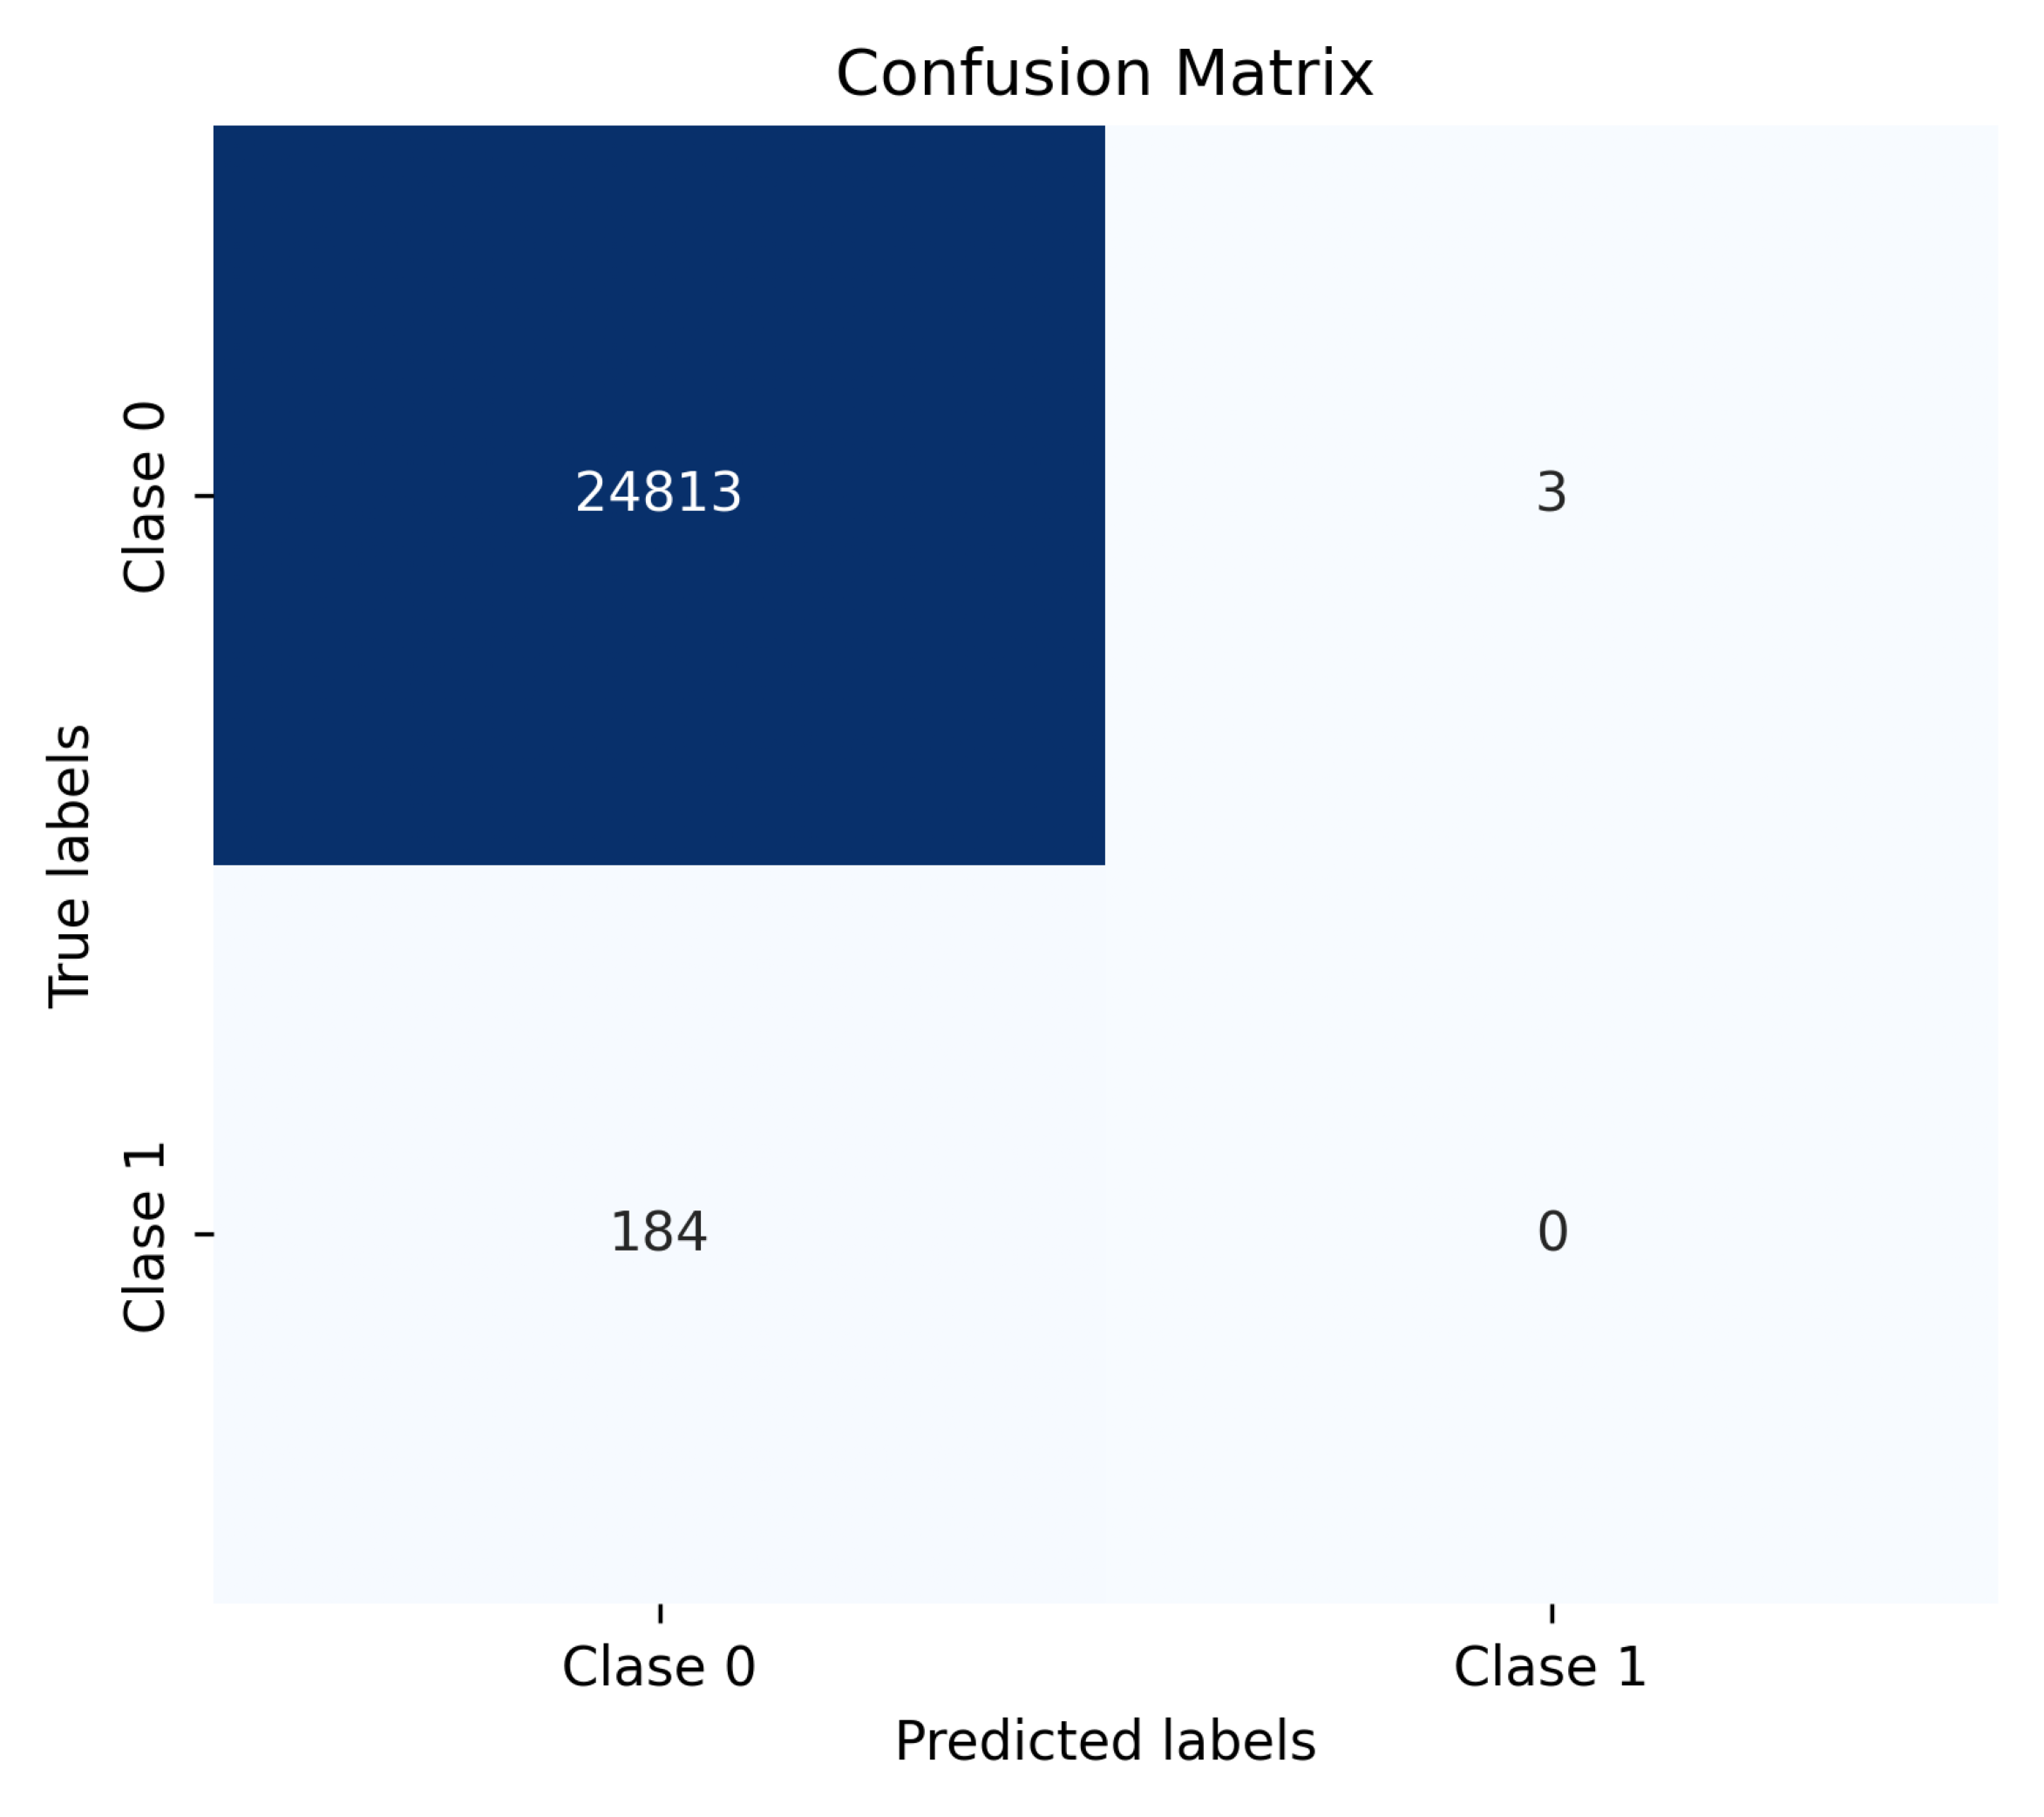

In [73]:
'''y_pred = (predict_log_seh > 0.5).astype(int)
coo_matrix = confusion_matrix(seh.y_test, y_pred)
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.savefig('conf3_2.png', dpi=300, bbox_inches='tight')
    plt.show()
cm2 = np.array(coo_matrix)
class_names = ['Clase 0', 'Clase 1']
plot_confusion_matrix(cm2, class_names)
print(cm2)'''
plt.figure(figsize=(30, 80))  
img = mpimg.imread('documentos_ejercicio3\\conf3_2.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [74]:
'''data = {
    'Modelo': ['Logsitc'],
    'Precision': [
        precision_score(seh.y_test, y_pred1)
    ],
    'Recall': [
        recall_score(seh.y_test, y_pred1)
    ],
    'F1 Score': [

        f1_score(seh.y_test, y_pred1)
    ],
    'ROC AUC': [
        roc_auc_score(seh.y_test, predict_log_seh)
    ]
}'''
data = {'Modelo': ['Logsitc'],'Precision': [0],'Recall': [0],'F1 Score': [0],'ROC AUC': [0.68266]}
data_log = pd.DataFrame(data)
data_log

Modelo  Precision  Recall  F1 Score  ROC AUC
0  Logsitc          0       0         0  0.68266

### Curva ROC - 'sEH'

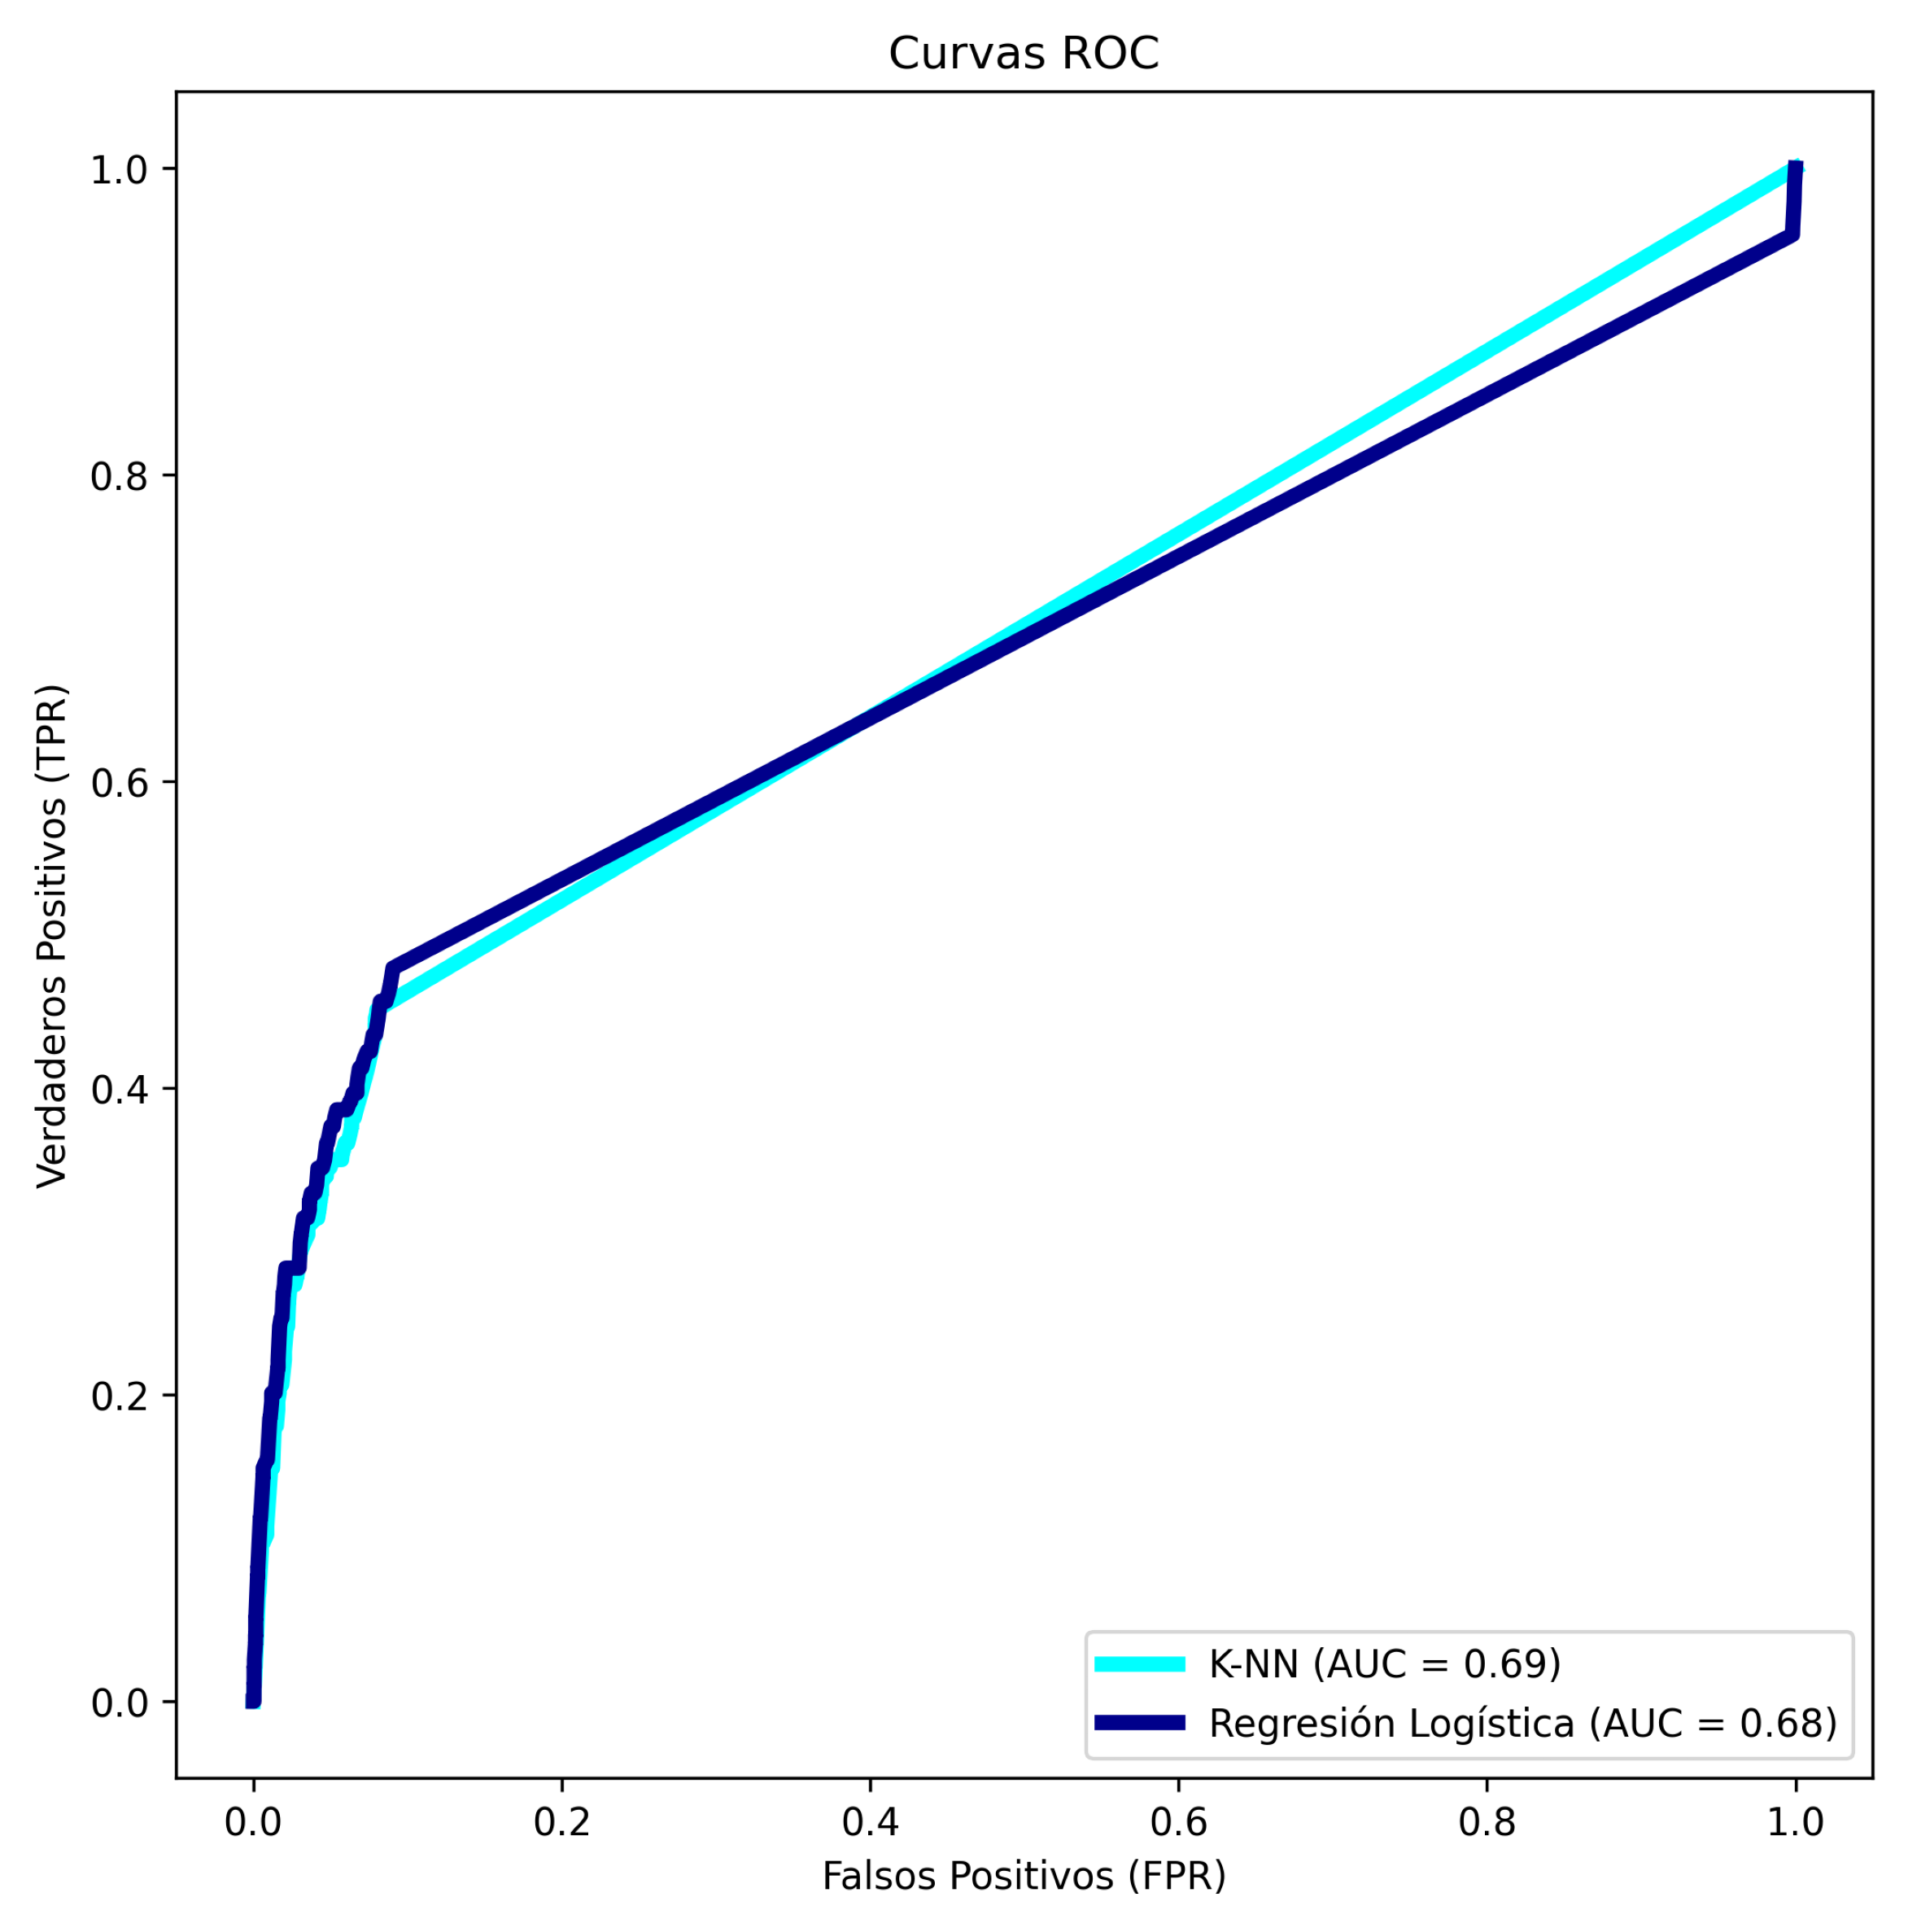

In [75]:
'''a, b, _ = roc_curve(seh.y_test, predict_knn_seh)
roc_auc_knn = roc_auc_score(seh.y_test, predict_knn_seh)
c, d, _ = roc_curve(seh.y_test, predict_log_seh)
roc_auc_log = roc_auc_score(seh.y_test, predict_log_seh)
plt.figure(figsize=(8, 8))
plt.plot(a, b, color = '#00FFFF', label = f'K-NN (AUC = {roc_auc_knn:.2f})', lw = 4)
plt.plot(c, d, color = '#00008B', label = f'Regresión Logística (AUC = {roc_auc_log:.2f})', lw = 4)
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.savefig('cuva3.png', dpi=300, bbox_inches='tight')
plt.grid(True)
plt.show()'''
plt.figure(figsize=(30, 80))  
img = mpimg.imread('documentos_ejercicio3\\cuva3.png')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [76]:
df_concat = pd.concat([data_knn, data_log], ignore_index=True)
df_concat

Modelo  Precision  Recall  F1 Score  ROC AUC
0      Knn          0       0         0  0.69050
1  Logsitc          0       0         0  0.68266

En este análisis comparativo entre los modelos K-Nearest Neighbors (K-NN) y la Regresión Logística, las curvas ROC reflejan que ambos modelos presentan rendimientos relativamente similares. El AUC para el modelo K-NN es de 0.69, mientras que el de Regresión Logística es de 0.68. Ambos valores sugieren un desempeño moderado en términos de discriminación entre clases, con una ligera ventaja para K-NN.

Al observar las métricas en el DataFrame, vemos que tanto el modelo K-NN como el de Regresión Logística tienen valores de precisión, recall y F1 Score igual a 0. Esto indica que, en esta evaluación en particular, ninguno de los dos modelos está capturando correctamente las clases positivas